In [1]:
import numpy as np
import pandas as pd
import scdata as sc
import matplotlib.pyplot as plt

sc.__version__

Found Environment file at: /Users/dani/.cache/scdata/.env


'1.3.0'

## Devices in the Twinair project

In [2]:
devices = pd.read_excel("T6.1 - TwinAIR Pilots - Sensor Deployments.xlsx", sheet_name="DEVICES")
devices

Pilot Country Location              Site            Room  \
0         Germany     CIIT     Main Building              EG   
1         Germany     CIIT     Main Building              EG   
2         Germany     CIIT     Main Building              EG   
3         Germany     CIIT     Main Building              EG   
4         Germany     CIIT     Main Building      EG-Outdoor   
..            ...      ...               ...             ...   
146         Spain   Avanza  Huesca-Barcelona            8620   
147       Ireland   Dublin       BroomBridge          ROOMGF   
148       Ireland   Dublin       BroomBridge          ROOMGF   
149       Ireland   Dublin     EPA Rathmines             NaN   
150       Ireland   Dublin            Harold  Teacher's Room   

     High-level use case           id                 Type  \
0                    NaN        17711          TWINAIR SP1   
1                    NaN  17712/18456          TWINAIR SP2   
2                    NaN        18401          TWINAIR SP1   
3                    NaN        18400          TWINAIR SP2   
4                    NaN        18833  TWINAIR SP2 OUTDOOR   
..                   ...          ...                  ...   
146                  NaN        18377          TWINAIR SP2   
147                  NaN        18247          TWINAIR SP1   
148                  NaN        18246          TWINAIR SP2   
149                  NaN        18560  TWINAIR SP2 OUTDOOR   
150                  NaN        16771      TWINAIR INTERIM   

                    Correct name                          Original name  \
0             CIIT_MAIN_EG_#D3CD                     CIIT_MAIN_EG_#D3CD   
1             CIIT_MAIN_EG_#2ECA                     CIIT_MAIN_EG_#2ECA   
2             CIIT_MAIN_EG_#A068                                    NaN   
3             CIIT_MAIN_EG_#9EE9                                    NaN   
4             CIIT_MAIN_EG_#B11F                                    NaN   
..                           ...                                    ...   
146            AVZ_8620_CA_#86D5                              AVZ-T2-05   
147  DUB_BBRIDGE_ET_ROOMGF_#A06D                                    NaN   
148  DUB_BBRIDGE_ET_ROOMGF_#4F1D                                    NaN   
149                DUB_ RM_#8069                                    NaN   
150   DUB_HAROLDS_TEACHERS_#8606  HAROLD'S SCHOOL F080 - Teacher's room   

                              user_tags              added_at Data Location  \
0    ['TwinAIR', 'Ground Floor', 'Lab']  2024-07-25T09:32:30Z     SC Server   
1    ['TwinAIR', 'Ground Floor', 'Lab']  2025-02-03T14:27:18Z     SC Server   
2    ['TwinAIR', 'Ground Floor', 'Lab']  2025-01-20T11:25:31Z     SC Server   
3    ['TwinAIR', 'Ground Floor', 'Lab']  2025-01-20T11:20:28Z     SC Server   
4           ['TwinAIR', 'Ground Floor']  2025-07-07T13:09:03Z     SC Server   
..                                  ...                   ...           ...   
146                         ['TwinAIR']   2025-01-26 00:00:00           NaN   
147                         ['TwinAIR']   2024-11-22 00:00:00     SC Server   
148                         ['TwinAIR']   2024-11-22 00:00:00     SC Server   
149                         ['TwinAIR']   2025-03-05 00:00:00     SC Server   
150                  ['TwinAIR', 'UCD']   2025-03-20 00:00:00     SC Server   

    usable                               sampling_rate  \
0        Y             All metrics: 1Min, PM, PN: 3Min   
1        Y             All metrics: 1Min, PM, PN: 3Min   
2        Y             All metrics: 1Min, PM, PN: 3Min   
3        Y             All metrics: 1Min, PM, PN: 3Min   
4        Y             All metrics: 1Min, PM, PN: 3Min   
..     ...                                         ...   
146    NaN                                         NaN   
147      Y  All metrics: 1Min, PM, PN: 3Min; CO2, HCHO   
148      N     All metrics: 1Min, PM, PN: 3Min; NO2/O3   
149      Y     All metrics: 1Min, PM, PN: 3Min; NO2/O3   
15

In [3]:
devices["id"] = pd.to_numeric(devices["id"], errors="coerce")

In [4]:
devices = devices.dropna(subset="id")
devices["id"] = devices["id"].astype(int)


/var/folders/zp/8f7jsfk57wv4xty1g8w6r_9c0000gn/T/ipykernel_97158/2160464054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devices["id"] = devices["id"].astype(int)


In [5]:
devices

Pilot Country Location              Site            Room  \
0         Germany     CIIT     Main Building              EG   
2         Germany     CIIT     Main Building              EG   
3         Germany     CIIT     Main Building              EG   
4         Germany     CIIT     Main Building      EG-Outdoor   
5         Germany     CIIT             THOWL           1.375   
..            ...      ...               ...             ...   
146         Spain   Avanza  Huesca-Barcelona            8620   
147       Ireland   Dublin       BroomBridge          ROOMGF   
148       Ireland   Dublin       BroomBridge          ROOMGF   
149       Ireland   Dublin     EPA Rathmines             NaN   
150       Ireland   Dublin            Harold  Teacher's Room   

     High-level use case     id                 Type  \
0                    NaN  17711          TWINAIR SP1   
2                    NaN  18401          TWINAIR SP1   
3                    NaN  18400          TWINAIR SP2   
4                    NaN  18833  TWINAIR SP2 OUTDOOR   
5                    NaN  18062          TWINAIR SP2   
..                   ...    ...                  ...   
146                  NaN  18377          TWINAIR SP2   
147                  NaN  18247          TWINAIR SP1   
148                  NaN  18246          TWINAIR SP2   
149                  NaN  18560  TWINAIR SP2 OUTDOOR   
150                  NaN  16771      TWINAIR INTERIM   

                    Correct name                          Original name  \
0             CIIT_MAIN_EG_#D3CD                     CIIT_MAIN_EG_#D3CD   
2             CIIT_MAIN_EG_#A068                                    NaN   
3             CIIT_MAIN_EG_#9EE9                                    NaN   
4             CIIT_MAIN_EG_#B11F                                    NaN   
5         CIIT_THOWL_1.375_#CA98                                    NaN   
..                           ...                                    ...   
146            AVZ_8620_CA_#86D5                              AVZ-T2-05   
147  DUB_BBRIDGE_ET_ROOMGF_#A06D                                    NaN   
148  DUB_BBRIDGE_ET_ROOMGF_#4F1D                                    NaN   
149                DUB_ RM_#8069                                    NaN   
150   DUB_HAROLDS_TEACHERS_#8606  HAROLD'S SCHOOL F080 - Teacher's room   

                              user_tags              added_at Data Location  \
0    ['TwinAIR', 'Ground Floor', 'Lab']  2024-07-25T09:32:30Z     SC Server   
2    ['TwinAIR', 'Ground Floor', 'Lab']  2025-01-20T11:25:31Z     SC Server   
3    ['TwinAIR', 'Ground Floor', 'Lab']  2025-01-20T11:20:28Z     SC Server   
4           ['TwinAIR', 'Ground Floor']  2025-07-07T13:09:03Z     SC Server   
5            ['TwinAIR', 'Third Floor']  2024-10-16T10:54:24Z     SC Server   
..                                  ...                   ...           ...   
146                         ['TwinAIR']   2025-01-26 00:00:00           NaN   
147                         ['TwinAIR']   2024-11-22 00:00:00     SC Server   
148                         ['TwinAIR']   2024-11-22 00:00:00     SC Server   
149                         ['TwinAIR']   2025-03-05 00:00:00     SC Server   
150                  ['TwinAIR', 'UCD']   2025-03-20 00:00:00     SC Server   

    usable                               sampling_rate  \
0        Y             All metrics: 1Min, PM, PN: 3Min   
2        Y             All metrics: 1Min, PM, PN: 3Min   
3        Y             All metrics: 1Min, PM, PN: 3Min   
4        Y             All metrics: 1Min, PM, PN: 3Min   
5        Y             All metrics: 1Min, PM, PN: 3Min   
..     ...                                         ...   
146    NaN                                         NaN   
147      Y  All metrics: 1Min, PM, PN: 3Min; CO2, HCHO   
148      N     All metrics: 1Min, PM, PN: 3Min; NO2/O3   
149      Y     All metrics: 1Min, PM, PN: 3Min; NO2/O3   
150      Y             All metrics: 1Min, PM, PN: 3Min   

               

## Loading device data

### Getting those in Greece and in Avanza buses

For comparison: Thriassio ones should be well taken care of, Avanza not so much.

In [6]:
thriassio = devices[devices["Location"]=="Thriassio"]
avanza = devices[devices["Location"]=="Avanza"]

In [7]:
from smartcitizen_connector import SCDevice

thriassio_devices = []
avanza_devices = []

for device_id in thriassio["id"]:
    thriassio_devices.append(SCDevice(device_id))
    
    
for device_id in avanza["id"]:
    avanza_devices.append(SCDevice(device_id))


[2025-11-13 09:39:29,867] - smartcitizen_connector - INFO - Bearer found in environment, using it.
[2025-11-13 09:39:30,100] - smartcitizen_connector - INFO - Device has status message
[2025-11-13 09:39:30,143] - smartcitizen_connector - INFO - Device 16980 timezone is Europe/Athens
[2025-11-13 09:39:30,144] - smartcitizen_connector - INFO - Checking postprocessing of 16980
[2025-11-13 09:39:30,144] - smartcitizen_connector - WARNING - No postprocessing information
[2025-11-13 09:39:30,145] - smartcitizen_connector - INFO - No blueprint url
[2025-11-13 09:39:30,146] - smartcitizen_connector - INFO - Device 16980 initialized
[2025-11-13 09:39:30,147] - smartcitizen_connector - INFO - Bearer found in environment, using it.
[2025-11-13 09:39:30,344] - smartcitizen_connector - INFO - Device has status message
[2025-11-13 09:39:30,352] - smartcitizen_connector - INFO - Device 16983 timezone is Europe/Athens
[2025-11-13 09:39:30,353] - smartcitizen_connector - INFO - Checking postprocessing 

### `smartcitizen_connector.device.device.SCDevice`


#### Choose one for playing with

I get a `JSONDecodeError`

In [8]:
sample = thriassio_devices[0]
print(sample.id)
type(sample)

16980


smartcitizen_connector.device.device.SCDevice

In [9]:
d = await sample.get_data()

[2025-11-13 09:39:38,472] - smartcitizen_connector - INFO - Make sure we are up to date
[2025-11-13 09:39:38,675] - smartcitizen_connector - INFO - Device has status message
[2025-11-13 09:39:38,682] - smartcitizen_connector - INFO - Requesting data from SC API
[2025-11-13 09:39:38,683] - smartcitizen_connector - INFO - Device ID: 16980
[2025-11-13 09:39:38,684] - smartcitizen_connector - INFO - Using rollup: 1m
[2025-11-13 09:39:38,689] - smartcitizen_connector - INFO - No min_date specified
[2025-11-13 09:39:38,690] - smartcitizen_connector - INFO - Device 16980 timezone: Europe/Athens
[2025-11-13 09:39:38,690] - smartcitizen_connector - INFO - Sensor IDs: ['AMS CCS811 - TVOC: 113', 'AMS CCS811 - eCO2: 112', 'Battery SCK: 10', 'NXP MPL3115A2 - Barometric Pressure: 58', 'Plantower PMS5003 - PM1: 89', 'Plantower PMS5003 - PM10: 88', 'Plantower PMS5003 - PM2.5: 87', 'Plantower PMS5003 - PN0.3: 165', 'Plantower PMS5003 - PN0.5: 166', 'Plantower PMS5003 - PN1.0: 167', 'Plantower PMS5003 -

In [10]:
sample.url

'https://api.smartcitizen.me/v0/devices/16980'

In [11]:
sample.blueprint

In [12]:
sample.json

Device(id=16980, uuid='2bfa6539-f35f-4c3b-b404-85d965e31f50', name='TGH_MAIN_EMERGENCY_#307A', description='TwinAIR Interim Pack', state='has_published', postprocessing=None, hardware=HardwareInfo(name='SCK 2.1 SFA30 and SCD30', type='SCK', version='2.1', slug='sck:2,1'), system_tags=['indoor', 'online'], user_tags=['TwinAIR'], data_policy=Policy(is_private=False, precise_location=True, enable_forwarding=True), notify=Notifications(low_battery=True, stopped_publishing=True), last_reading_at=datetime.datetime(2025, 11, 13, 8, 38, 10, tzinfo=TzInfo(UTC)), created_at=datetime.datetime(2024, 1, 17, 10, 54, 32, tzinfo=TzInfo(UTC)), updated_at=datetime.datetime(2024, 9, 9, 15, 13, 20, tzinfo=TzInfo(UTC)), owner=Owner(id=8776, username='despina', role='', devices=None), data=Data(sensors=[Sensor(id=113, uuid='0c2a1afc-dc08-4066-aacb-0bde6a3ae6f5', name='AMS CCS811 - TVOC', description='Total Volatile Organic Compounds Digital Indoor Sensor', unit='ppb', measurement=Measurement(id=47, uuid='c6

In [13]:
sample.json.owner

Owner(id=8776, username='despina', role='', devices=None)

In [14]:
len(sample.json.data.sensors)

25

#### Explore `Sensor`

In [15]:
vars(sample.json.data.sensors[0])

{'id': 113,
 'uuid': '0c2a1afc-dc08-4066-aacb-0bde6a3ae6f5',
 'name': 'AMS CCS811 - TVOC',
 'description': 'Total Volatile Organic Compounds Digital Indoor Sensor',
 'unit': 'ppb',
 'measurement': Measurement(id=47, uuid='c6f9a729-1782-4da1-adc9-e88b7143e45c', name='TVOC', description='Total volatile organic compounds is a grouping of a wide range of organic chemical compounds to simplify reporting when these are present in ambient air or emissions. Many substances, such as natural gas, could be classified as volatile organic compounds (VOCs).', definition=None),
 'datasheet': None,
 'unit_definition': None,
 'value': 65.0,
 'prev_value': 83.0,
 'last_reading_at': datetime.datetime(2025, 11, 13, 8, 38, 10, tzinfo=TzInfo(UTC)),
 'tags': [],
 'default_key': 'tvoc'}

In [16]:
sample.json.data.sensors[0]

Sensor(id=113, uuid='0c2a1afc-dc08-4066-aacb-0bde6a3ae6f5', name='AMS CCS811 - TVOC', description='Total Volatile Organic Compounds Digital Indoor Sensor', unit='ppb', measurement=Measurement(id=47, uuid='c6f9a729-1782-4da1-adc9-e88b7143e45c', name='TVOC', description='Total volatile organic compounds is a grouping of a wide range of organic chemical compounds to simplify reporting when these are present in ambient air or emissions. Many substances, such as natural gas, could be classified as volatile organic compounds (VOCs).', definition=None), datasheet=None, unit_definition=None, value=65.0, prev_value=83.0, last_reading_at=datetime.datetime(2025, 11, 13, 8, 38, 10, tzinfo=TzInfo(UTC)), tags=[], default_key='tvoc')

In [17]:
sample.json.data.sensors[0].value

65.0

In [18]:
sample.json.data.sensors[0].last_reading_at

datetime.datetime(2025, 11, 13, 8, 38, 10, tzinfo=TzInfo(UTC))

In [19]:
sample.json.data.sensors[0].measurement

Measurement(id=47, uuid='c6f9a729-1782-4da1-adc9-e88b7143e45c', name='TVOC', description='Total volatile organic compounds is a grouping of a wide range of organic chemical compounds to simplify reporting when these are present in ambient air or emissions. Many substances, such as natural gas, could be classified as volatile organic compounds (VOCs).', definition=None)

In [20]:
dir(sample.json.data.sensors[0])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_computed_fields__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_setattr_handl

In [21]:
sample.json.data.sensors[0].datasheet

In [22]:
sample.json.data.sensors[0].value

65.0

#### Explore `Device`

In [23]:
sample.json.hardware

HardwareInfo(name='SCK 2.1 SFA30 and SCD30', type='SCK', version='2.1', slug='sck:2,1')

In [24]:
sample.hardware_postprocessing

In [25]:
sample.json.model_computed_fields

/var/folders/zp/8f7jsfk57wv4xty1g8w6r_9c0000gn/T/ipykernel_97158/1763576557.py:1: PydanticDeprecatedSince211: Accessing the 'model_computed_fields' attribute on the instance is deprecated. Instead, you should access this attribute from the model class. Deprecated in Pydantic V2.11 to be removed in V3.0.
  sample.json.model_computed_fields


{}

In [26]:
sample.json.state

'has_published'

In [27]:
sample.json.updated_at

datetime.datetime(2024, 9, 9, 15, 13, 20, tzinfo=TzInfo(UTC))

### This doesn't work (anymore? 202-10-29)

```python
await sample.load()
```

`AttributeError: 'SCDevice' object has no attribute 'load'`


```python
differently = SCDevice(16980, params=sc.APIParams(blueprint="sc_air"))
```

```
ValidationError: 1 validation error for APIParams
id
  Field required [type=missing, input_value={'blueprint': 'sc_air'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
```

### scdata.Device

Same error, apparently.

```python
sample.id

d = sc.Device(blueprint='sc_air', params=sc.APIParams(id=sample.id))
await d.load()
``` 

I get a `JSONDecodeError` because there was is much data to load -> go against rate limit -> empty JSON -> decode error

In [28]:
d = sc.Device(blueprint='sc_air', params=sc.APIParams(id=sample.id))

[2025-11-13 09:43:14,386] - scdata - INFO - Setting handler as <class 'smartcitizen_connector.device.device.SCDevice'>
[2025-11-13 09:43:14,387] - smartcitizen_connector - INFO - Bearer found in environment, using it.
[2025-11-13 09:43:14,683] - smartcitizen_connector - INFO - Device has status message
[2025-11-13 09:43:14,695] - smartcitizen_connector - INFO - Device 16980 timezone is Europe/Athens
[2025-11-13 09:43:14,696] - smartcitizen_connector - INFO - Checking postprocessing of 16980
[2025-11-13 09:43:14,697] - smartcitizen_connector - WARNING - No postprocessing information
[2025-11-13 09:43:14,698] - smartcitizen_connector - INFO - No blueprint url
[2025-11-13 09:43:14,698] - smartcitizen_connector - INFO - Device 16980 initialized
[2025-11-13 09:43:14,702] - scdata - INFO - Device 16980 initialised


In [29]:
d.options

DeviceOptions(clean_na=None, frequency='1Min', resample=False, min_date=None, max_date=None, limit=None, channels=[], convert_units=True, convert_names=True, dateformat=None)

In [30]:
d.options.min_date='2025-09-01'  # Restrict the amount of data we request
await d.load()

[2025-11-13 09:43:14,716] - smartcitizen_connector - INFO - Make sure we are up to date
[2025-11-13 09:43:15,726] - smartcitizen_connector - INFO - Device has status message
[2025-11-13 09:43:15,733] - smartcitizen_connector - INFO - Requesting data from SC API
[2025-11-13 09:43:15,734] - smartcitizen_connector - INFO - Device ID: 16980
[2025-11-13 09:43:15,735] - smartcitizen_connector - INFO - Using rollup: 1m
[2025-11-13 09:43:15,737] - smartcitizen_connector - INFO - Min Date: 2025-09-01 00:00:00+00:00
[2025-11-13 09:43:15,738] - smartcitizen_connector - INFO - Device 16980 timezone: Europe/Athens
[2025-11-13 09:43:15,739] - smartcitizen_connector - INFO - Sensor IDs: ['AMS CCS811 - TVOC: 113', 'AMS CCS811 - eCO2: 112', 'Battery SCK: 10', 'NXP MPL3115A2 - Barometric Pressure: 58', 'Plantower PMS5003 - PM1: 89', 'Plantower PMS5003 - PM10: 88', 'Plantower PMS5003 - PM2.5: 87', 'Plantower PMS5003 - PN0.3: 165', 'Plantower PMS5003 - PN0.5: 166', 'Plantower PMS5003 - PN1.0: 167', 'Plant

True

## Actual data exploration

### Possible approaches for detecting bad sensors?

Currently, `get_outlier_ratio` applies a simple $ 1.5 \cdot IQR$ strategy. That doesn't seem super useful, but let's check.

Other possibilities are:
- Rolling mean + std, calculate band, note out of band values -> count how many per unit time, see if they increase (could indicate sensor increasingly defective)
- Flat value checks.

### Once loaded, first look

In [31]:
d.data

CCS811_VOCS  CCS811_ECO2  BATT   PRESS  \
TIME                                                                
2025-09-01 03:00:16+03:00        304.0       1665.0  99.0  100.63   
2025-09-01 03:01:16+03:00        304.0       1665.0  99.0  100.63   
2025-09-01 03:02:16+03:00        307.0       1668.0  99.0  100.63   
2025-09-01 03:03:16+03:00        312.0       1673.0  99.0  100.63   
2025-09-01 03:04:16+03:00        312.0       1673.0  99.0  100.63   
...                                ...          ...   ...     ...   
2025-11-13 10:33:05+02:00         84.0        956.0  98.0  102.00   
2025-11-13 10:34:05+02:00         86.0        967.0  98.0  102.00   
2025-11-13 10:35:05+02:00         86.0        967.0  98.0  101.99   
2025-11-13 10:36:05+02:00         86.0        967.0  99.0  102.00   
2025-11-13 10:37:05+02:00         83.0        945.0  98.0  102.00   

                           PMS5003_PM_1  PMS5003_PM_10  PMS5003_PM_25  \
TIME                                                                    
2025-09-01 03:00:16+03:00           NaN            NaN            NaN   
2025-09-01 03:01:16+03:00           NaN            NaN            NaN   
2025-09-01 03:02:16+03:00           0.0            1.0            0.0   
2025-09-01 03:03:16+03:00           NaN            NaN            NaN   
2025-09-01 03:04:16+03:00           NaN            NaN            NaN   
...                                 ...            ...            ...   
2025-11-13 10:33:05+02:00           NaN            NaN            NaN   
2025-11-13 10:34:05+02:00           NaN            NaN            NaN   
2025-11-13 10:35:05+02:00           NaN            NaN            NaN   
2025-11-13 10:36:05+02:00           2.0            7.0            6.0   
2025-11-13 10:37:05+02:00           NaN            NaN            NaN   

                           PMS5003_PN_03  PMS5003_PN_05  PMS5003_PN_1  ...  \
TIME                                                                   ...   
2025-09-01 03:00:16+03:00            NaN            NaN           NaN  ...   
2025-09-01 03:01:16+03:00            NaN            NaN           NaN  ...   
2025-09-01 03:02:16+03:00          116.0           91.0           0.0  ...   
2025-09-01 03:03:16+03:00            NaN            NaN           NaN  ...   
2025-09-01 03:04:16+03:00            NaN            NaN           NaN  ...   
...                                  ...            ...           ...  ...   
2025-11-13 10:33:05+02:00            NaN            NaN           NaN  ...   
2025-11-13 10:34:05+02:00            NaN            NaN           NaN  ...   
2025-11-13 10:35:05+02:00            NaN            NaN           NaN  ...   
2025-11-13 10:36:05+02:00          422.0          367.0          29.0  ...   
2025-11-13 10:37:05+02:00            NaN            NaN           NaN  ...   

                           SCD30_CO2  SCD30_HUM  SCD30_TEMP  SFA30_HCHO  \
TIME                                                                      
2025-09-01 03:00:16+03:00      413.0      43.40       25.48         1.0   
2025-09-01 03:01:16+03:00      412.0      43.45       25.50         1.0   
2025-09-01 03:02:16+03:00      414.0      43.43       25.48         1.0   
2025-09-01 03:03:16+03:00      414.0      43.55       25.53         1.0   
2025-09-01 03:04:16+03:00      414.0      43.70       25.51         1.2   
...                              ...        ...         ...         ...   
2025-11-13 10:33:05+02:00      771.0      36.23       25.99         0.8   
2025-11-13 10:34:05+02:00      765.0      36.23       25.99         0.8   
2025-11-13 10:35:05+02:00      770.0      36.24       26.01         0.8   
2025-11-13 10:36:05+02:00      774.0      36.27       26.02         0.8   
2025-11-13 10:37:05+02:00      775.0      36.42       26.02         1.0   

                           SFA30_HUM  SFA30_TEMP    HUM   TEMP  NOISE_A  RSSI  
TIME                                                                           
2025-09-01 03:00:16+03:00   

In [32]:
d.blueprint

'sc_air'

In [33]:
pd.DataFrame(d.get_nan_ratio()).mean()

CCS811_VOCS      0.023031
CCS811_ECO2      0.023031
BATT             0.019587
PRESS            0.019587
PMS5003_PM_1     0.016410
PMS5003_PM_10    0.016410
PMS5003_PM_25    0.016410
PMS5003_PN_03    0.016410
PMS5003_PN_05    0.016410
PMS5003_PN_1     0.016410
PMS5003_PN_10    0.016410
PMS5003_PN_25    0.016410
PMS5003_PN_5     0.016410
LIGHT            0.019587
SD-card          0.019587
SCD30_CO2        0.019587
SCD30_HUM        0.019587
SCD30_TEMP       0.019587
SFA30_HCHO       0.019587
SFA30_HUM        0.019587
SFA30_TEMP       0.019587
HUM              0.019587
TEMP             0.019587
NOISE_A          0.019587
RSSI             0.677664
dtype: float64

In [34]:
d.sensors[-1]

Sensor(id=220, name='Wi-Fi Antenna - RSSI', description='RSSI from Wi-Fi antenna', unit='dBm')

#### `get_outlier_ratio` returns a dict of series

In [35]:
pd.DataFrame(d.get_outlier_ratio())[-3:]

CCS811_VOCS  CCS811_ECO2      BATT    PRESS  PMS5003_PM_1  \
2025-11-11     0.871849     0.630252  0.000000  0.00000      0.000000   
2025-11-12     0.975610     0.970732  0.000697  0.37561      0.018815   
2025-11-13     0.992126     0.992126  0.000000  1.00000      0.000000   

            PMS5003_PM_10  PMS5003_PM_25  PMS5003_PN_03  PMS5003_PN_05  \
2025-11-11       0.000000       0.000000       0.000000       0.000000   
2025-11-12       0.018118       0.018815       0.017422       0.017422   
2025-11-13       0.000000       0.000000       0.000000       0.000000   

            PMS5003_PN_1  ...  SCD30_CO2  SCD30_HUM  SCD30_TEMP  SFA30_HCHO  \
2025-11-11      0.000000  ...   0.957983   0.146359    0.100140    0.000700   
2025-11-12      0.018815  ...   0.988850   0.379791    0.000000    0.000697   
2025-11-13      0.000000  ...   0.960630   0.856693    0.017323    0.001575   

            SFA30_HUM  SFA30_TEMP       HUM      TEMP   NOISE_A      RSSI  
2025-11-11   0.128151    0.106443  0.232493  0.109944  0.228291  0.285014  
2025-11-12   0.384669    0.000000  0.397909  0.000000  0.229965  0.177003  
2025-11-13   0.861417    0.018898  0.902362  0.018898  0.204724  0.160630  

[3 rows x 25 columns]

#### What do these values look like?

<Axes: >

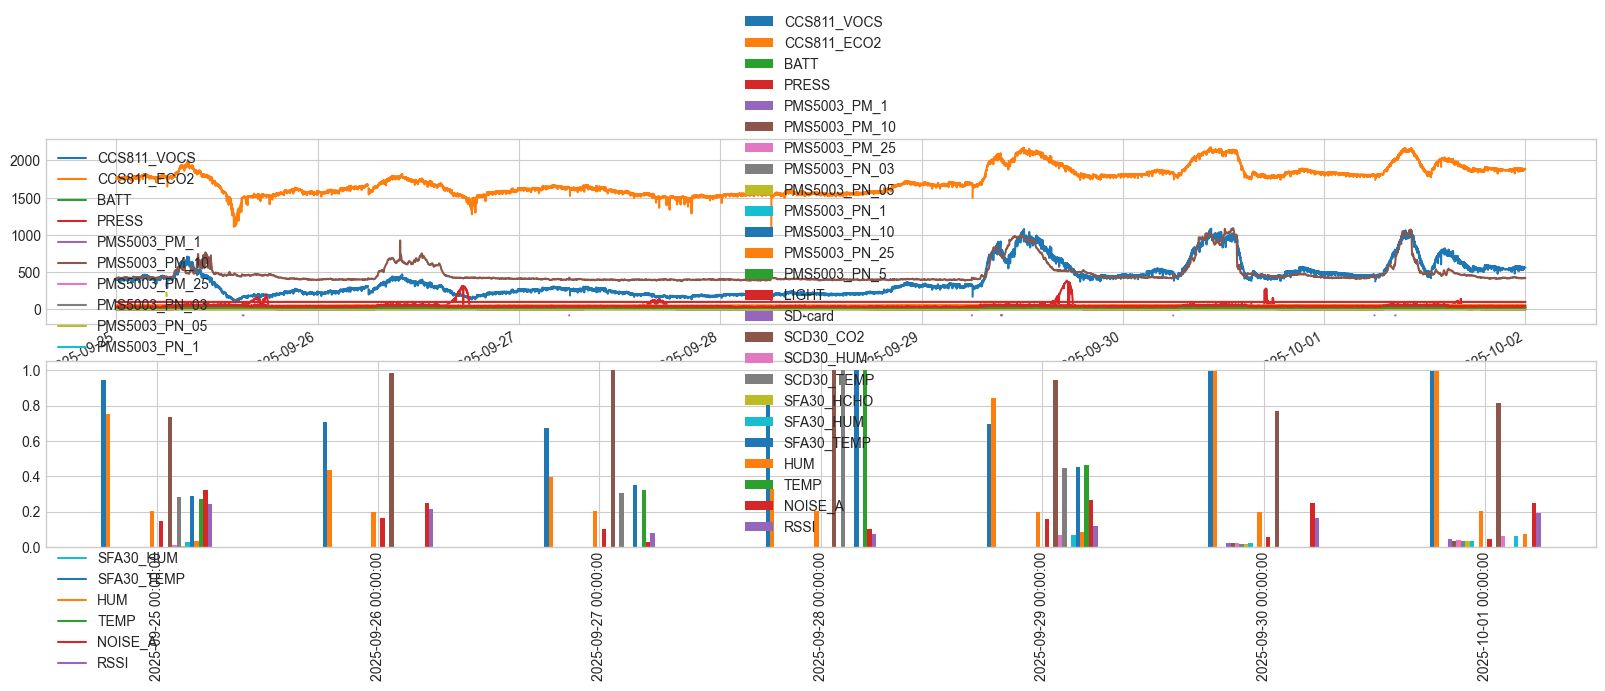

In [36]:
f = plt.figure(figsize=(20, 6))
ax = f.subplots(nrows=2)

last_week = d.data['2025-09-25':'2025-10-01']
last_week.plot(ax=ax[0])

outliers = pd.DataFrame(pd.DataFrame(d.get_outlier_ratio()))
outliers.index = pd.to_datetime(outliers.index)

last_week_outliers = outliers['2025-09-25':'2025-10-01']
last_week_outliers.plot(ax=ax[1], kind="bar")

Outlier ratio doesn't seem to be super useful as it is set up right now. Let's look at the sensors with the most outliers:

In [37]:
normalized = (last_week - last_week.std()) / last_week.mean()
normalized

CCS811_VOCS  CCS811_ECO2      BATT     PRESS  \
TIME                                                                      
2025-09-25 00:00:31+03:00     0.438673     0.909755  0.998892  0.995657   
2025-09-25 00:01:31+03:00     0.458560     0.912647  0.998892  0.995756   
2025-09-25 00:02:31+03:00     0.513248     0.923061  0.998892  0.995657   
2025-09-25 00:03:31+03:00     0.513248     0.923061  0.998892  0.995756   
2025-09-25 00:04:31+03:00     0.448617     0.911490  0.998892  0.995756   
...                                ...          ...       ...       ...   
2025-10-01 23:55:21+03:00     0.861266     0.986698  0.998892  0.996447   
2025-10-01 23:56:21+03:00     0.861266     0.986698  0.998892  0.996447   
2025-10-01 23:57:21+03:00     0.861266     0.986698  0.998892  0.996348   
2025-10-01 23:58:21+03:00     0.861266     0.986698  0.998892  0.996348   
2025-10-01 23:59:21+03:00     0.861266     0.986698  0.998892  0.996348   

                           PMS5003_PM_1  PMS5003_PM_10  PMS5003_PM_25  \
TIME                                                                    
2025-09-25 00:00:31+03:00           NaN            NaN            NaN   
2025-09-25 00:01:31+03:00           NaN            NaN            NaN   
2025-09-25 00:02:31+03:00           NaN            NaN            NaN   
2025-09-25 00:03:31+03:00     -2.531755      -1.266023      -1.566677   
2025-09-25 00:04:31+03:00           NaN            NaN            NaN   
...                                 ...            ...            ...   
2025-10-01 23:55:21+03:00           NaN            NaN            NaN   
2025-10-01 23:56:21+03:00           NaN            NaN            NaN   
2025-10-01 23:57:21+03:00     -1.811481      -0.188435      -0.032656   
2025-10-01 23:58:21+03:00           NaN            NaN            NaN   
2025-10-01 23:59:21+03:00           NaN            NaN            NaN   

                           PMS5003_PN_03  PMS5003_PN_05  PMS5003_PN_1  ...  \
TIME                                                                   ...   
2025-09-25 00:00:31+03:00            NaN            NaN           NaN  ...   
2025-09-25 00:01:31+03:00            NaN            NaN           NaN  ...   
2025-09-25 00:02:31+03:00            NaN            NaN           NaN  ...   
2025-09-25 00:03:31+03:00       0.062982       0.006873     -2.400497  ...   
2025-09-25 00:04:31+03:00            NaN            NaN           NaN  ...   
...                                  ...            ...           ...  ...   
2025-10-01 23:55:21+03:00            NaN            NaN           NaN  ...   
2025-10-01 23:56:21+03:00            NaN            NaN           NaN  ...   
2025-10-01 23:57:21+03:00       0.572497       0.631272     -2.065031  ...   
2025-10-01 23:58:21+03:00            NaN            NaN           NaN  ...   
2025-10-01 23:59:21+03:00            NaN            NaN           NaN  ...   

                           SCD30_CO2  SCD30_HUM  SCD30_TEMP  SFA30_HCHO  \
TIME                                                                      
2025-09-25 00:00:31+03:00   0.572973   0.922584    0.934232    0.938201   
2025-09-25 00:01:31+03:00   0.577127   0.923902    0.933440    0.938201   
2025-09-25 00:02:31+03:00   0.579203   0.923902    0.933440    0.938201   
2025-09-25 00:03:31+03:00   0.581280   0.924561    0.934232    0.938201   
2025-09-25 00:04:31+03:00   0.581280   0.923023    0.933043    0.740113   
...                              ...        ...         ...         ...   
2025-10-01 23:55:21+03:00   0.579203   1.015518    0.949690    1.136289   
2025-10-01 23:56:21+03:00   0.579203   1.014858    0.949690    1.136289   
2025-10-01 23:57:21+03:00   0.577127   1.015518    0.949294    1.136289   
2025-10-01 23:58:21+03:00   0.577127   1.015737    0.949294    1.136289   
2025-10-01 23:59:21+03:00   0.577127   1.015298    0.949294    1.136289   

                           SFA30_HUM  SFA30_TEMP       HUM      TEMP  \
TIME                                  

Let's normalize to see better

<Axes: >

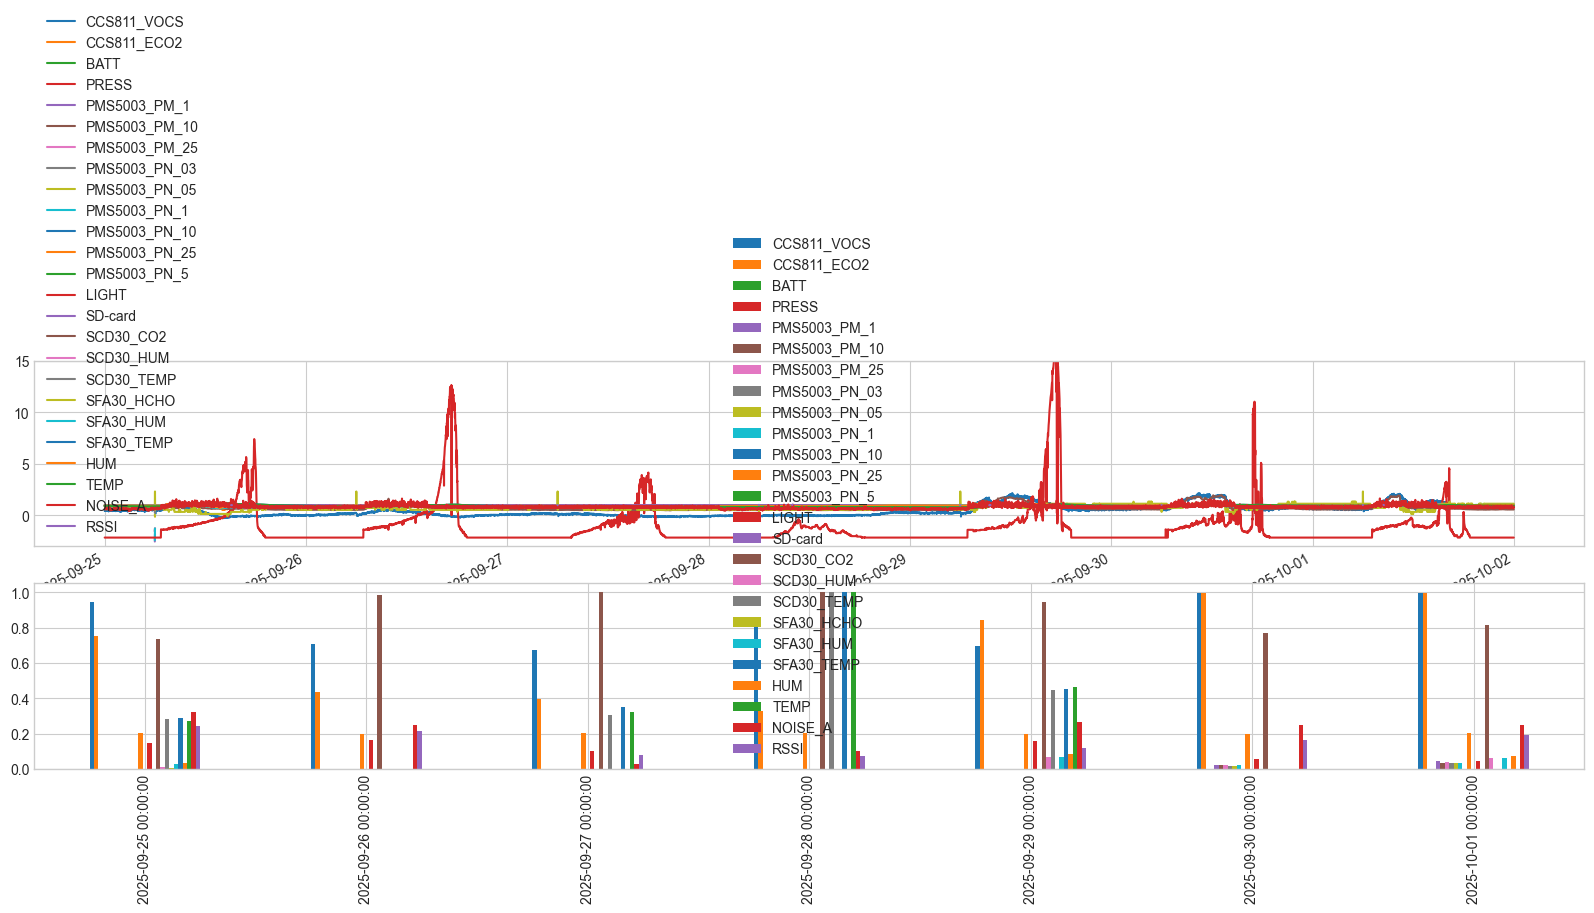

In [38]:
f = plt.figure(figsize=(20, 6))
ax = f.subplots(nrows=2)


normalized.plot(ax=ax[0])
ax[0].set_ylim([-3, 15])
last_week_outliers.plot(ax=ax[1], kind="bar")

In [39]:
last_week_outliers.mean().sort_values(ascending=False)[:10]

SCD30_CO2        0.892940
CCS811_VOCS      0.837299
CCS811_ECO2      0.677996
SFA30_TEMP       0.298479
TEMP             0.293249
SCD30_TEMP       0.290588
NOISE_A          0.209041
PMS5003_PN_25    0.199980
RSSI             0.154845
LIGHT            0.095149
dtype: float64

<Axes: >

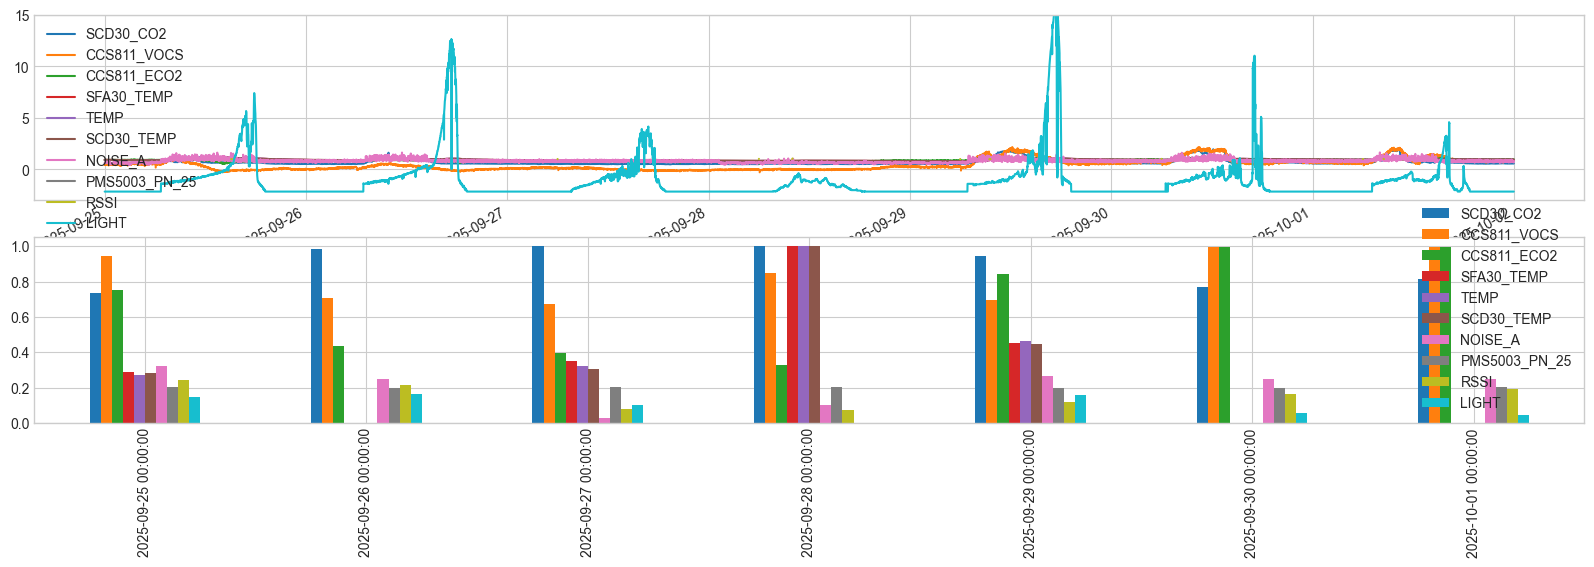

In [40]:
high_outlier_variables = last_week_outliers.mean().sort_values(ascending=False)[:10]

f = plt.figure(figsize=(20, 6))
ax = f.subplots(nrows=2)


normalized[high_outlier_variables.index].plot(ax=ax[0])
ax[0].set_ylim([-3, 15])
last_week_outliers[high_outlier_variables.index].plot(ax=ax[1], kind="bar")

#### Digression: Sensor names are unintuitive

In [41]:
[s for s in d.sensors if s.name in high_outlier_variables.index.values]

[]

Why don't they match?

In [42]:
d.data.columns

Index(['CCS811_VOCS', 'CCS811_ECO2', 'BATT', 'PRESS', 'PMS5003_PM_1',
       'PMS5003_PM_10', 'PMS5003_PM_25', 'PMS5003_PN_03', 'PMS5003_PN_05',
       'PMS5003_PN_1', 'PMS5003_PN_10', 'PMS5003_PN_25', 'PMS5003_PN_5',
       'LIGHT', 'SD-card', 'SCD30_CO2', 'SCD30_HUM', 'SCD30_TEMP',
       'SFA30_HCHO', 'SFA30_HUM', 'SFA30_TEMP', 'HUM', 'TEMP', 'NOISE_A',
       'RSSI'],
      dtype='object')

In [43]:
d.sensors 

[Sensor(id=113, name='AMS CCS811 - TVOC', description='Total Volatile Organic Compounds Digital Indoor Sensor', unit='ppb'),
 Sensor(id=112, name='AMS CCS811 - eCO2', description='Equivalent Carbon Dioxide Digital Indoor Sensor', unit='ppm'),
 Sensor(id=10, name='Battery SCK', description='Custom Circuit', unit='%'),
 Sensor(id=58, name='NXP MPL3115A2 - Barometric Pressure', description='Digital Barometric Pressure Sensor', unit='kPa'),
 Sensor(id=89, name='Plantower PMS5003 - PM1', description='Particulate Matter PM1', unit='ug/m3'),
 Sensor(id=88, name='Plantower PMS5003 - PM10', description='Particulate Matter PM10', unit='ug/m3'),
 Sensor(id=87, name='Plantower PMS5003 - PM2.5', description='Particulate Matter PM2.5', unit='ug/m3'),
 Sensor(id=165, name='Plantower PMS5003 - PN0.3', description='Particle Matter PN0.3', unit='#/0.1l'),
 Sensor(id=166, name='Plantower PMS5003 - PN0.5', description='Particle Matter PN0.5', unit='#/0.1l'),
 Sensor(id=167, name='Plantower PMS5003 - PN1.0

In [44]:
d.sensors[0].description

'Total Volatile Organic Compounds Digital Indoor Sensor'

#### Back on track

A simple quartile outlier ratio is not going to be super informative. For example, any sensor that has a bimodal distribution will show many outliers. That's probably what's happening with, at least, light and noise:

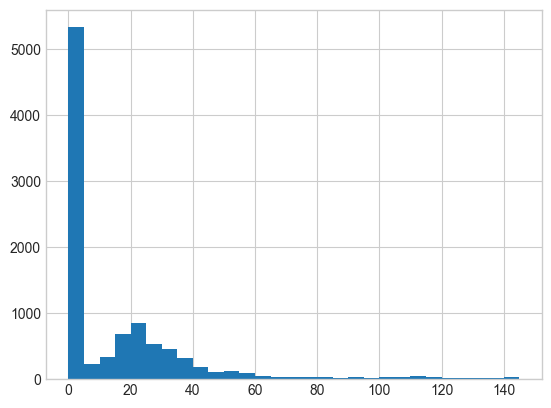

In [45]:
plt.hist(last_week["LIGHT"], bins=range(0,150,5));

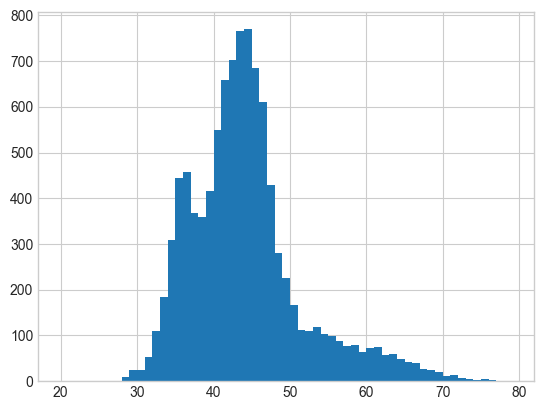

In [46]:
plt.hist(last_week["NOISE_A"], bins=range(20,80,1));

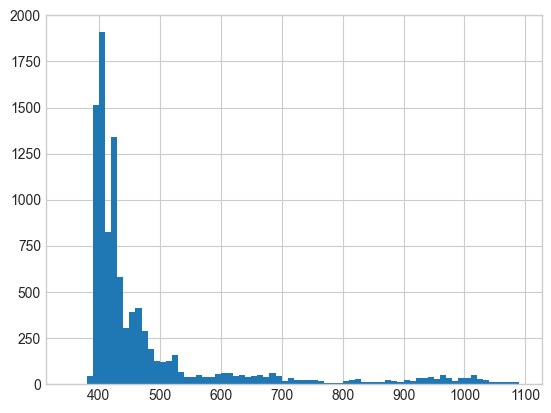

In [47]:
plt.hist(last_week["SCD30_CO2"], bins=range(350,1100,10));

Also temperature: clearly empty/in use:

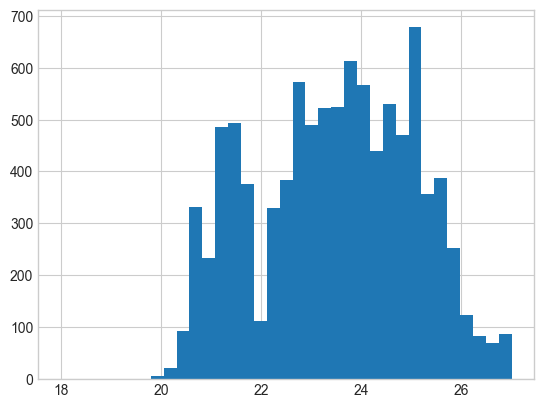

In [48]:
plt.hist(last_week["SFA30_TEMP"], bins=np.linspace(18, 27, 36));

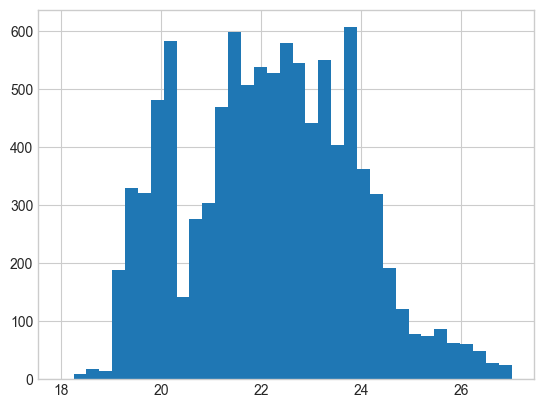

In [49]:
plt.hist(last_week["TEMP"], bins=np.linspace(18, 27, 36));

#### Failure modes 

Especially focused on Particulate Matter (PM) sensors.

- Erratic measurements -> outliers
- Flat measurements, especially at special values: 0, 1023, 99dB...

We have [some samples of known bad sensors](https://drive.google.com/drive/folders/1R_NKU0BD_hVwu0yeT0ThdAkpjNI__C5u?usp=sharing): download them (if you have access) to reproduce the following code.

In [50]:
!ls SAMPLES

12985.csv 13168.csv 13170.csv 13172.csv README.md
13167.csv 13169.csv 13171.csv 9606.csv


In [51]:
import glob

samples = {}

for f in glob.glob("SAMPLES/*.csv"):
    print(f)
    df = pd.read_csv(f, index_col="TIME", parse_dates=True)
    df.index = pd.to_datetime(df.index, utc=True)
    
    samples[f] = df

SAMPLES/13168.csv
SAMPLES/13169.csv
SAMPLES/12985.csv
SAMPLES/9606.csv
SAMPLES/13170.csv
SAMPLES/13171.csv
SAMPLES/13167.csv
SAMPLES/13172.csv


In [52]:
samples["SAMPLES/13168.csv"].head()

PMS5003_PM_1  PMS5003_PM_10  PMS5003_PM_25
TIME                                                                 
2020-09-24 09:46:16+00:00           1.0            4.0            3.0
2020-09-24 09:47:16+00:00           0.0            0.0            0.0
2020-09-24 09:48:16+00:00           1.0            1.0            1.0
2020-09-24 09:49:16+00:00           0.0            1.0            1.0
2020-09-24 09:50:16+00:00           0.0            1.0            1.0

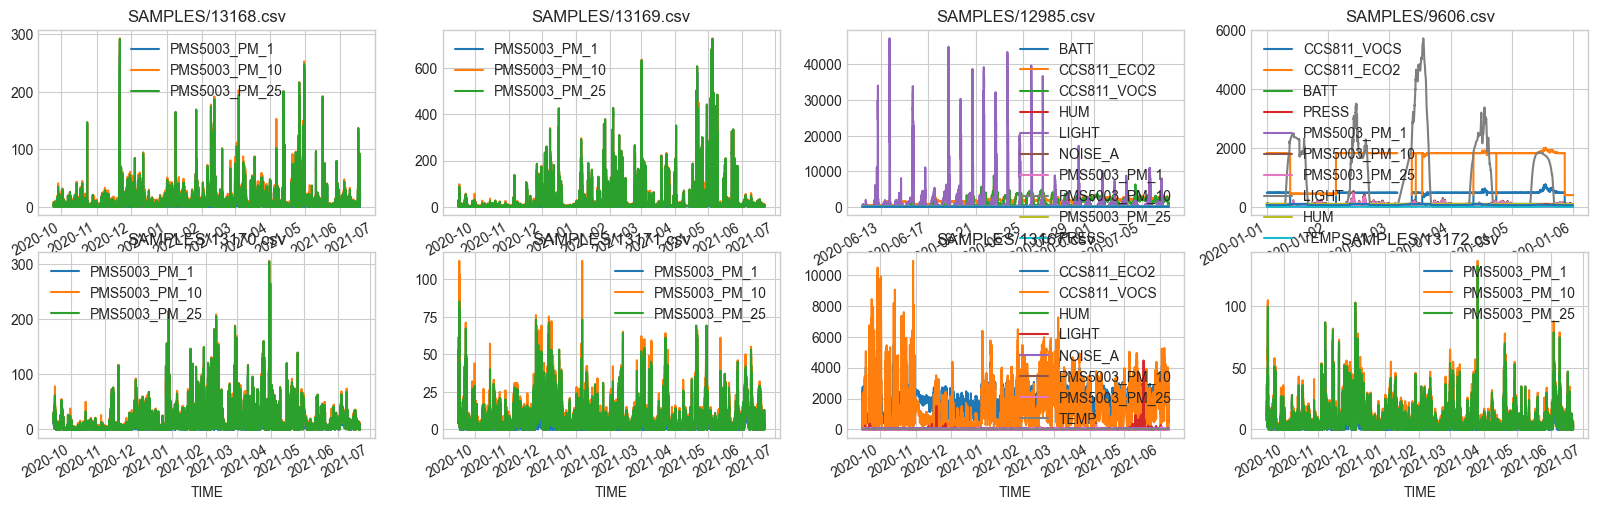

In [53]:
f, axes = plt.subplots(2, 4)
f.set_size_inches(20, 6)

for i, (name, df) in enumerate(samples.items()):
    this_ax = axes[i // 4, i % 4]
    df.plot(ax=this_ax)
    this_ax.set_title(name)
    

##### Stuck values

<Axes: xlabel='TIME'>

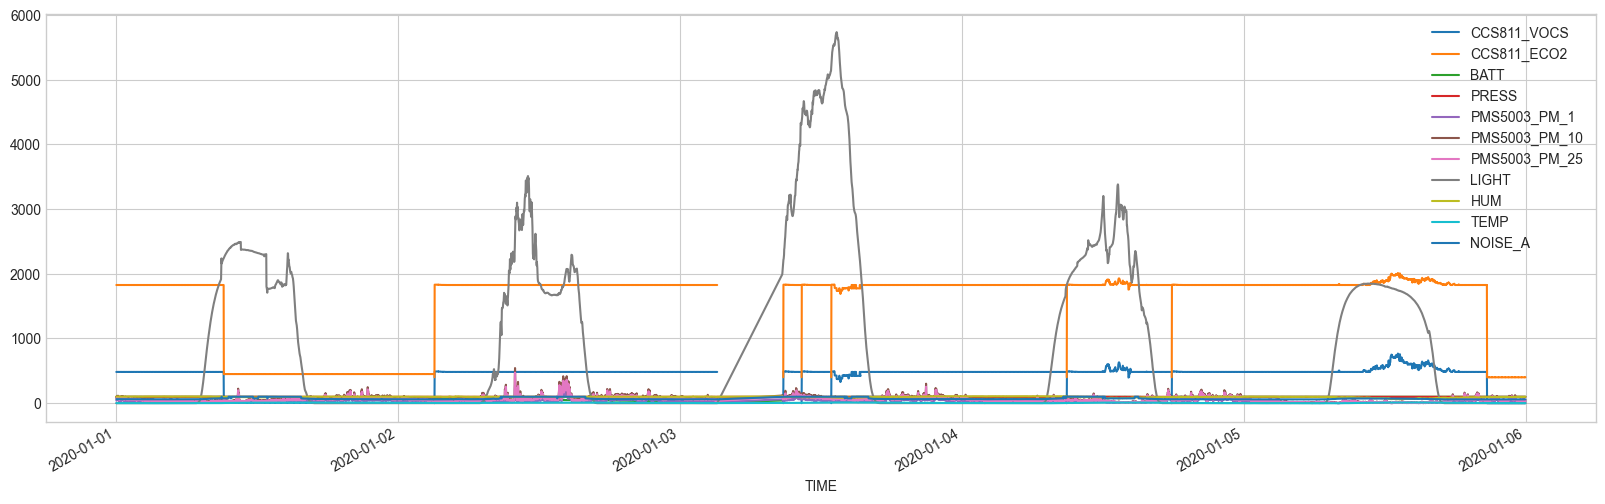

In [54]:
f, axes = plt.subplots(1,1)
f.set_size_inches(20, 6)
samples["SAMPLES/9606.csv"].plot(ax=axes)

In [55]:
samples["SAMPLES/9606.csv"].columns

Index(['CCS811_VOCS', 'CCS811_ECO2', 'BATT', 'PRESS', 'PMS5003_PM_1',
       'PMS5003_PM_10', 'PMS5003_PM_25', 'LIGHT', 'HUM', 'TEMP', 'NOISE_A'],
      dtype='object')

<Axes: xlabel='TIME'>

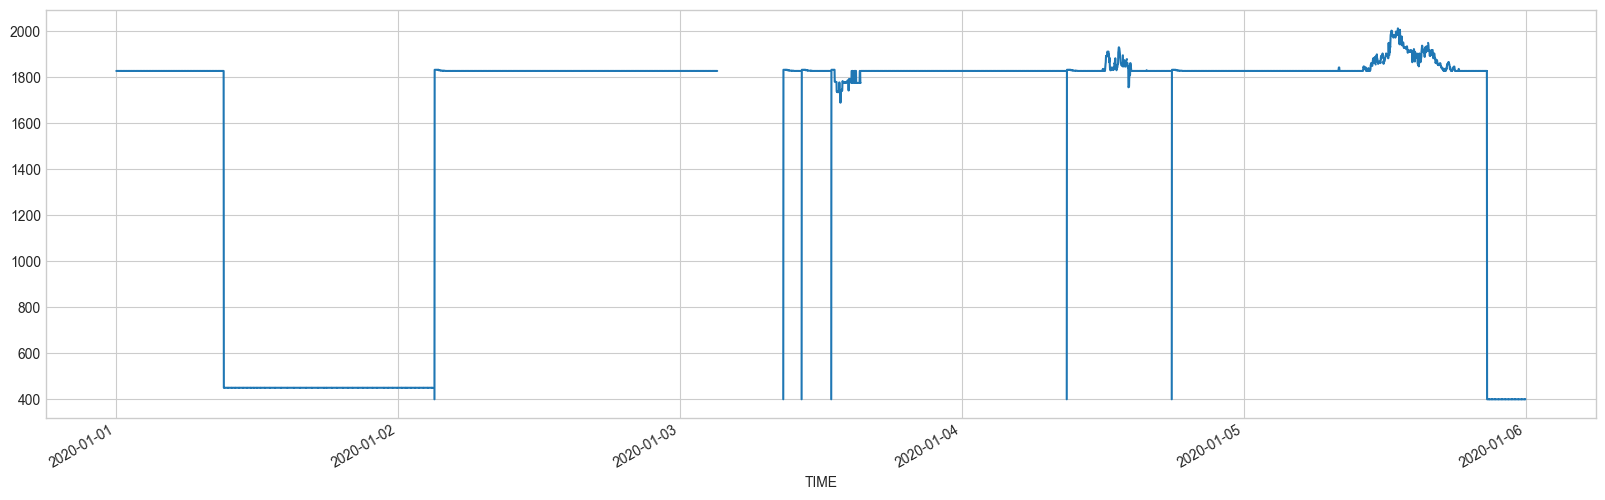

In [56]:
f, axes = plt.subplots(1,1)
f.set_size_inches(20, 6)
samples["SAMPLES/9606.csv"]['CCS811_ECO2'].plot(ax=axes)

In [57]:
samples["SAMPLES/9606.csv"]['CCS811_ECO2'].value_counts().sort_values(ascending=False)

CCS811_ECO2
1827.0    4240
450.0      992
400.0      187
1832.0     111
1828.0     100
          ... 
1897.0       1
1867.0       1
1847.0       1
1906.0       1
1945.0       1
Name: count, Length: 88, dtype: int64

Clearly 1827, 450 and probably some others are bad values. 

Possible metric: # value counts of the most frequent.

In [58]:
df.columns

Index(['PMS5003_PM_1', 'PMS5003_PM_10', 'PMS5003_PM_25'], dtype='object')

##### Erratic readings

Oscar gives me pointers to know bad datapoints:

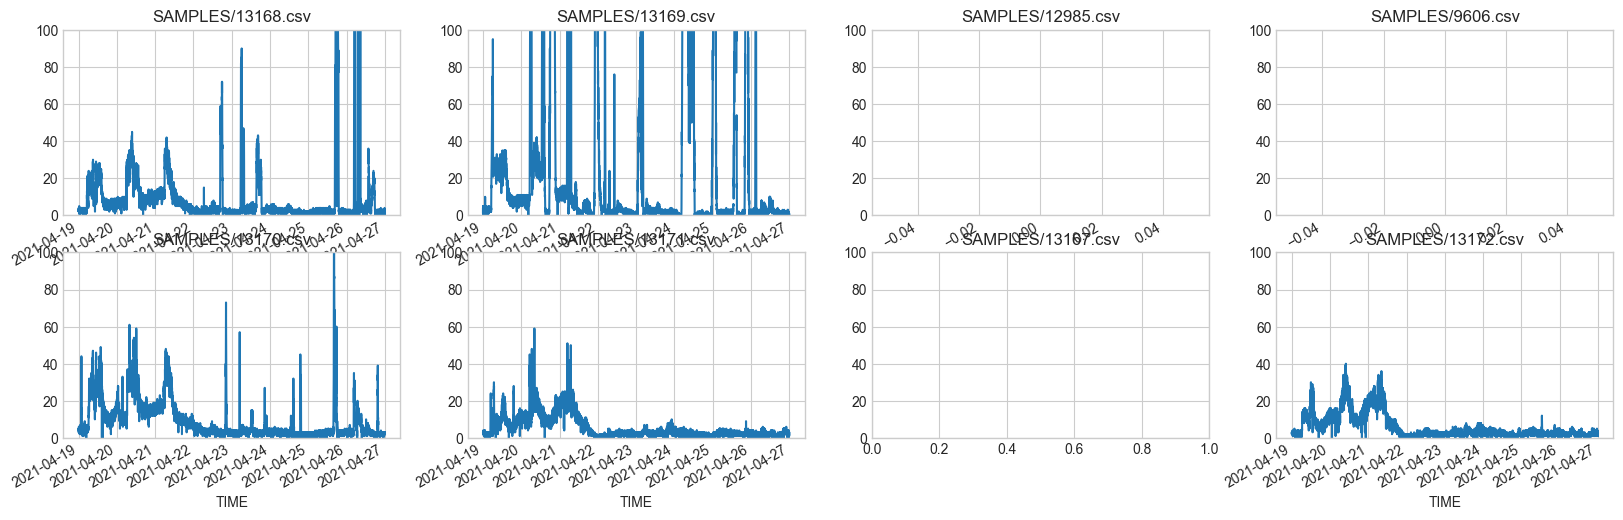

In [59]:
f, axes = plt.subplots(2, 4)
f.set_size_inches(20, 6)

for i, (name, df) in enumerate(samples.items()):
    this_ax = axes[i // 4, i % 4]
    if "PMS5003_PM_1" in df.columns:
        df["2021-04-19":"2021-04-26"]["PMS5003_PM_1"].plot(ax=this_ax)
    this_ax.set_title(name)
    this_ax.set_ylim(0, 100)
    

(18423.146328125, 18451.55822048611)

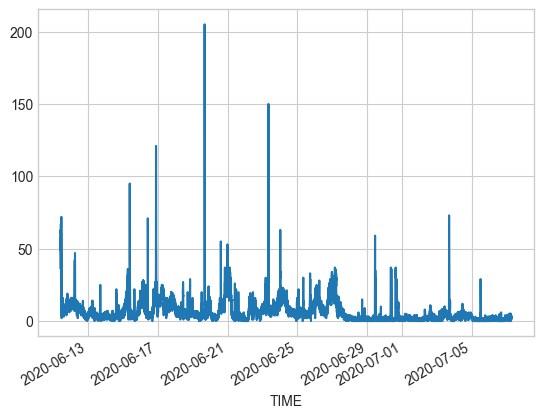

In [60]:
samples["SAMPLES/12985.csv"]["PMS5003_PM_1"].plot()
plt.gca().get_xlim()

DM: "Pero aquí, qué picos son fallos y cuáles no?"

OG: "el único bueno parece el de abajo a la derecha"

In [61]:
df = samples["SAMPLES/12985.csv"]
particulates = df.columns[df.columns.str.startswith("PM")]

<Axes: xlabel='TIME'>

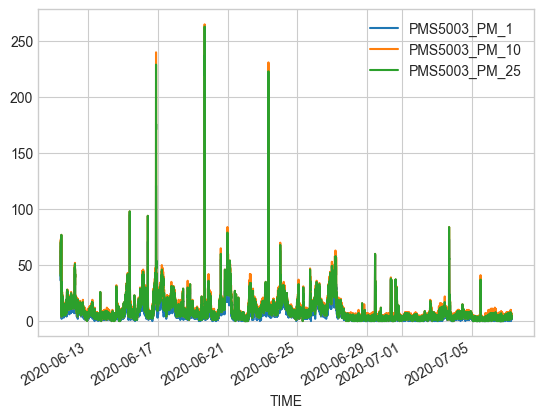

In [62]:
samples["SAMPLES/12985.csv"][particulates].plot()

<Axes: xlabel='TIME'>

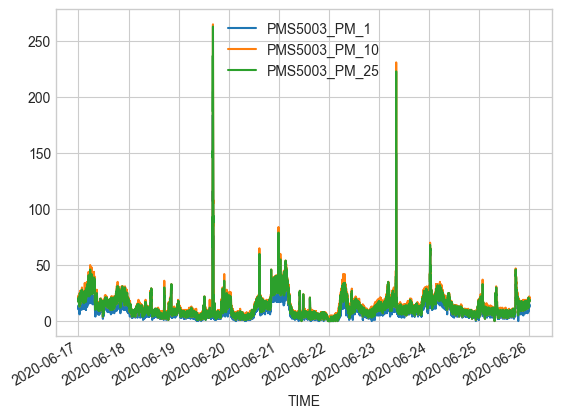

In [63]:
samples["SAMPLES/12985.csv"]["2020-06-17":"2020-06-25"][particulates].plot()

<Axes: xlabel='TIME'>

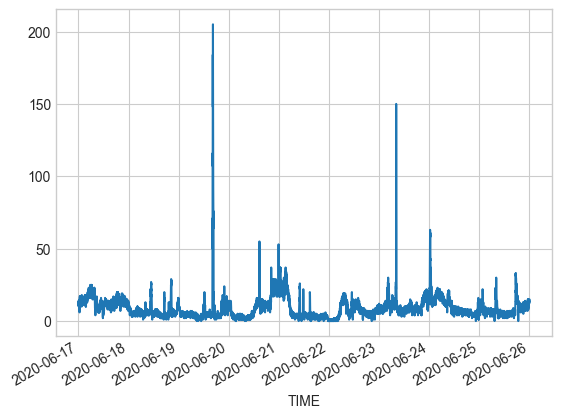

In [64]:
samples["SAMPLES/12985.csv"]["2020-06-17":"2020-06-25"]["PMS5003_PM_1"].plot()

##### Moving to the first derivative

How does the rolling diff look?

<Axes: xlabel='TIME'>

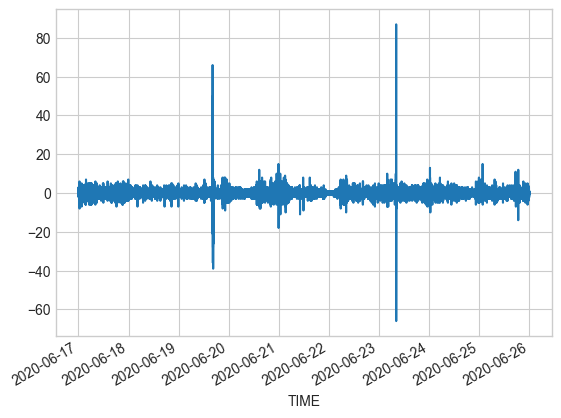

In [65]:
rolling_diff = samples["SAMPLES/12985.csv"]["PMS5003_PM_1"].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
rolling_diff["2020-06-17":"2020-06-25"].plot()

Looks great!! How are the diffs distributed?

In [66]:
rolling_diff.mean(), rolling_diff.std()

(-0.0017276367026819502, 1.9586489742778153)

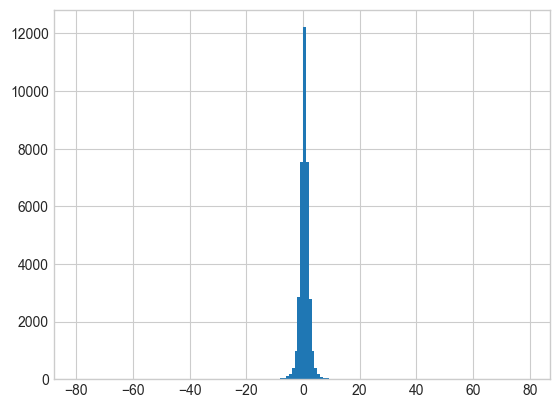

In [67]:
plt.hist(rolling_diff, bins=np.arange(-80, 80, 1.0));


Is that a normal distribution?



In [68]:
from scipy.stats import normaltest

normaltest(rolling_diff, nan_policy="omit")

NormaltestResult(statistic=34050.39281575923, pvalue=0.0)

It is most definitely not.

### Does this hold for others?

Let's see how the first derivative transformation holds for other sensors/devices

In [69]:
def rolling_difference(data, columns=None):

    if columns is not None:
        data = data[columns]
        
    result = data.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])

    return result

In [70]:
test_case = samples["SAMPLES/12985.csv"]

rolllll = rolling_difference(test_case)

<Axes: xlabel='TIME'>

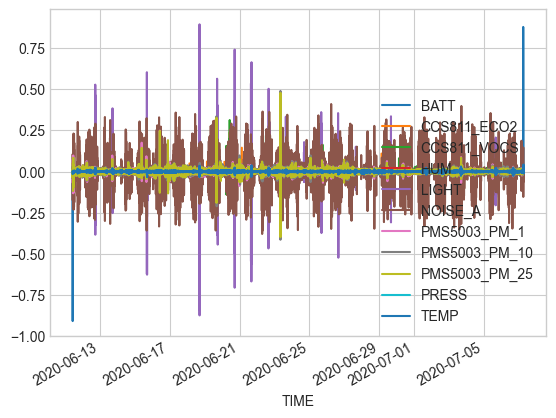

In [71]:
(rolllll / test_case.max()).plot()

<Axes: xlabel='TIME'>

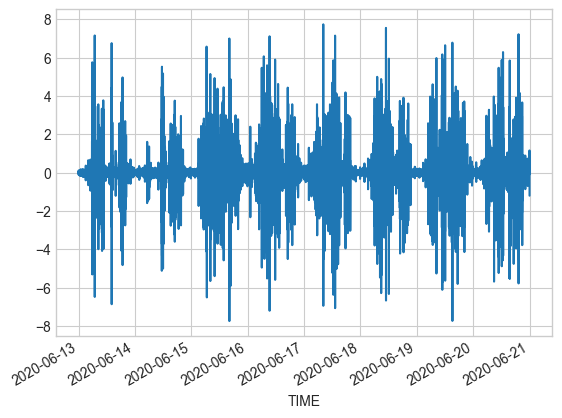

In [72]:
noise = rolllll["2020-06-13":"2020-06-20"]["NOISE_A"]
((noise - noise.mean()) / noise.std()).plot()

I guess that looks like a good sensor

<Axes: xlabel='TIME'>

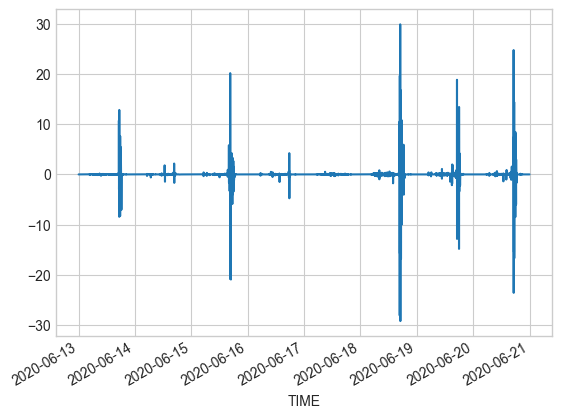

In [73]:
light = rolllll["2020-06-13":"2020-06-20"]["LIGHT"]
((light - light.mean()) / light.std()).plot()

How about this one?

In [74]:
rolllll.columns

Index(['BATT', 'CCS811_ECO2', 'CCS811_VOCS', 'HUM', 'LIGHT', 'NOISE_A',
       'PMS5003_PM_1', 'PMS5003_PM_10', 'PMS5003_PM_25', 'PRESS', 'TEMP'],
      dtype='object')

<Axes: xlabel='TIME'>

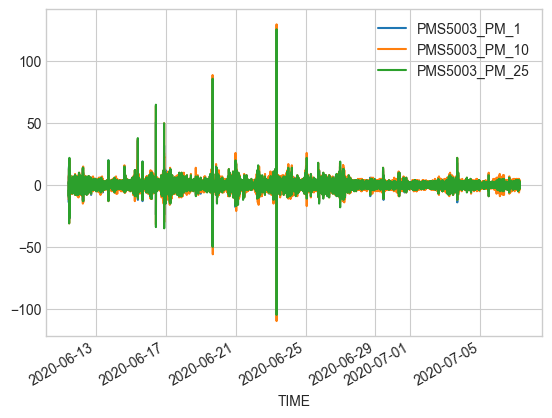

In [75]:
((rolllll - rolllll.mean()/ rolllll.std()))[["PMS5003_PM_1","PMS5003_PM_10","PMS5003_PM_25"]].plot()

In [76]:
all([sensor in df.columns for sensor in particulates])

True

In [77]:
particulates.values

array(['PMS5003_PM_1', 'PMS5003_PM_10', 'PMS5003_PM_25'], dtype=object)

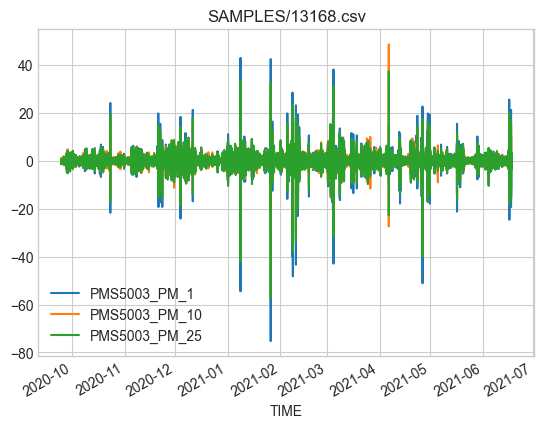

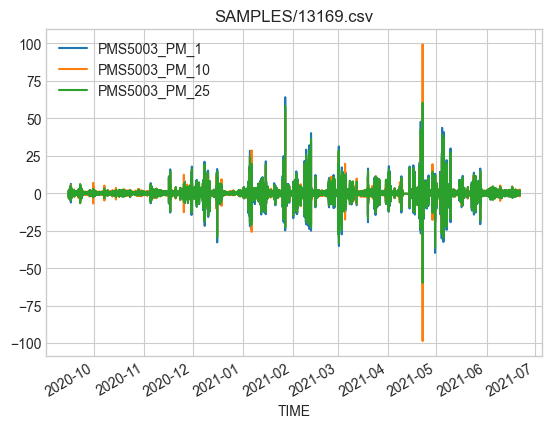

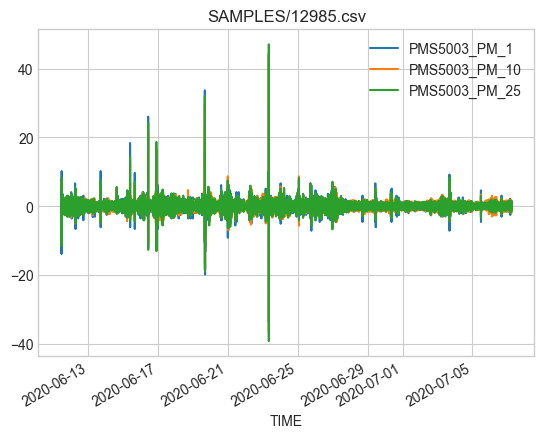

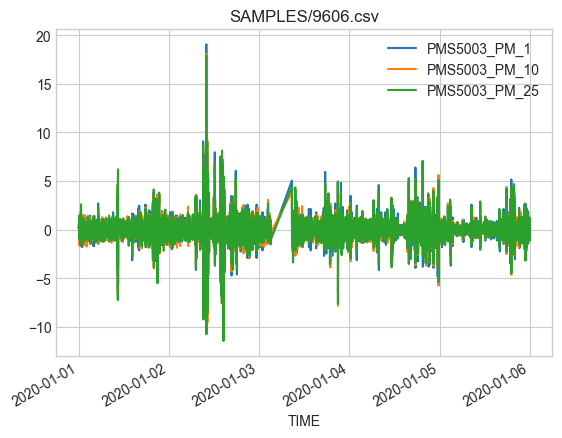

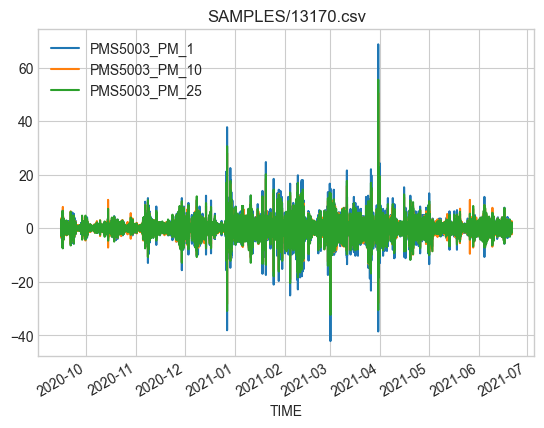

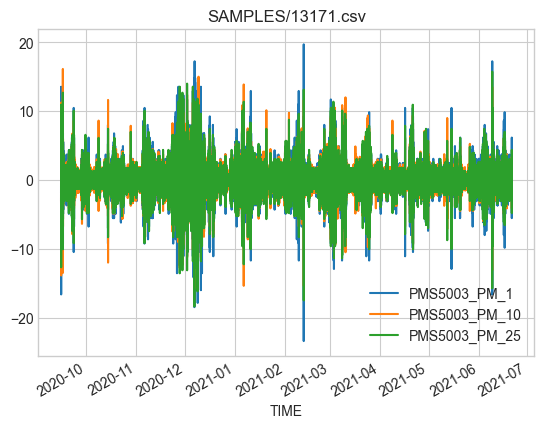

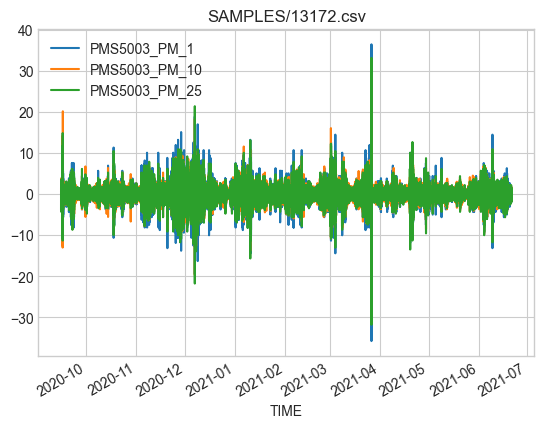

In [78]:
for name, device in samples.items():
    if all([sensor in device.columns for sensor in particulates]):
        rolling = rolling_difference(device, particulates.values)
        normalized = (rolling - rolling.mean()) / rolling.std()
        

        normalized.plot()
        plt.title(name)        

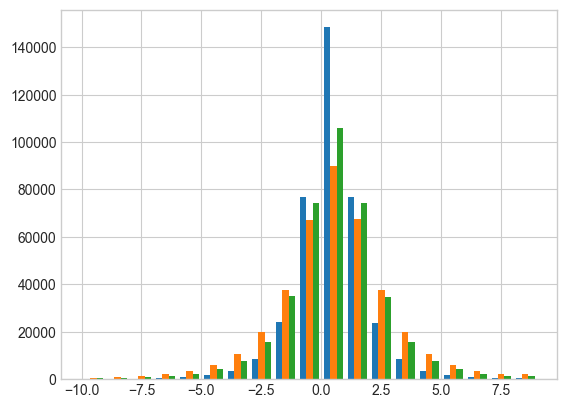

In [79]:
plt.hist(rolling, bins=range(-10, 10, 1));

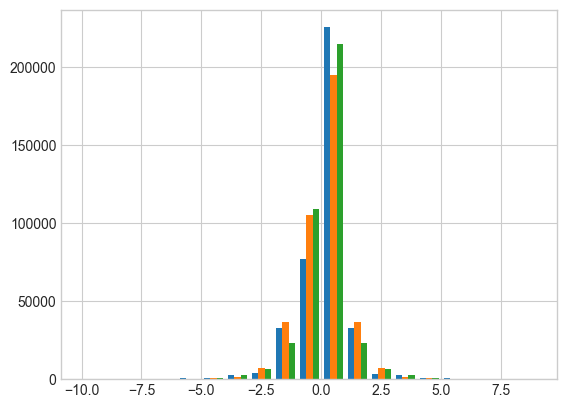

In [80]:
plt.hist(normalized, bins=range(-10, 10, 1));

### Testing for outliers

- Is there degradation of devices? What is the progression of any health metric?



- How to integrate into chupiflow and API?
- Periodicity of review?
- How to ping?



#### Rolling count of transgressor observations

Eg device `12985`


Alternatives: 

1. Write down a specific diff threshould value for a sensor model
2. Get that from the readings of the sensor itself.

If 2, how do we get the values from a sensor that is itself misbehaving?

Algorithm first idea:

1. Calculate rolling diff with the previous observation
2. Remove extreme values 
3. Get distribution stats from those central values
4. Use those to detect outliers in the original rolling diff.

In [81]:
test_case = samples["SAMPLES/12985.csv"]
test_case

BATT  CCS811_ECO2  CCS811_VOCS    HUM  LIGHT  \
TIME                                                                      
2020-06-11 10:30:24+00:00  89.0        400.0          0.0  52.87  523.0   
2020-06-11 10:31:24+00:00  90.0        400.0          0.0  52.42  505.0   
2020-06-11 10:32:24+00:00  90.0        400.0          0.0  52.57  554.0   
2020-06-11 10:33:24+00:00  -1.0        400.0          0.0  53.47  320.0   
2020-06-11 10:34:24+00:00  -1.0        400.0          0.0  53.31  315.0   
...                         ...          ...          ...    ...    ...   
2020-07-07 06:20:03+00:00  98.0       1905.0        592.0  54.29  113.0   
2020-07-07 06:21:05+00:00  98.0       1889.0        570.0  55.07  112.0   
2020-07-07 06:22:06+00:00  98.0       1908.0        596.0  55.31   90.0   
2020-07-07 06:23:09+00:00  98.0       1898.0        582.0  55.93   99.0   
2020-07-07 06:24:09+00:00  98.0       1879.0        554.0  56.40   85.0   

                           NOISE_A  PMS5003_PM_1  PMS5003_PM_10  \
TIME                                                              
2020-06-11 10:30:24+00:00    46.71          61.0           73.0   
2020-06-11 10:31:24+00:00    47.14          63.0           66.0   
2020-06-11 10:32:24+00:00    53.40          49.0           59.0   
2020-06-11 10:33:24+00:00    62.36          51.0           56.0   
2020-06-11 10:34:24+00:00    47.59          52.0           60.0   
...                            ...           ...            ...   
2020-07-07 06:20:03+00:00    49.28           2.0            4.0   
2020-07-07 06:21:05+00:00    48.61           2.0            3.0   
2020-07-07 06:22:06+00:00    48.41           2.0            3.0   
2020-07-07 06:23:09+00:00    48.31           2.0            3.0   
2020-07-07 06:24:09+00:00    48.71           2.0            3.0   

                           PMS5003_PM_25   PRESS   TEMP  
TIME                                                     
2020-06-11 10:30:24+00:00           70.0  100.80  23.78  
2020-06-11 10:31:24+00:00           66.0  100.80  23.92  
2020-06-11 10:32:24+00:00           59.0  100.81  23.96  
2020-06-11 10:33:24+00:00           55.0  100.80  23.50  
2020-06-11 10:34:24+00:00           58.0  100.80  23.63  
...                                  ...     ...    ...  
2020-07-07 06:20:03+00:00            4.0  101.88  22.29  
2020-07-07 06:21:05+00:00            3.0  101.88  22.08  
2020-07-07 06:22:06+00:00            3.0  101.89  21.77  
2020-07-07 06:23:09+00:00            3.0  101.89  21.54  
2020-07-07 06:24:09+00:00            3.0  101.88  21.28  

[36788 rows x 11 columns]

In [82]:
roll_diff = rolling_difference(test_case, columns="PMS5003_PM_25")
roll_diff.quantile([.1, .9])

0.1   -2.0
0.9    2.0
Name: PMS5003_PM_25, dtype: float64

In [83]:
roll_diff.quantile([.01, .99])

0.01   -6.0
0.99    6.0
Name: PMS5003_PM_25, dtype: float64

That's interesting! Only a tiny number of observations represent more than a few points difference from the prior observation.

In [84]:
central = roll_diff[((roll_diff > roll_diff.quantile(.01)) | (roll_diff > roll_diff.quantile(.99)))]
roll_diff.count(), central.count()  # Should represent 98% of the observations


(36737, 36165)

In [85]:
roll_diff.mean(), roll_diff.std(), central.mean(), central.std()

(-0.0014426872090807633,
 2.6752741499670605,
 0.13139776026545003,
 2.3533975858256238)

<Axes: xlabel='TIME'>

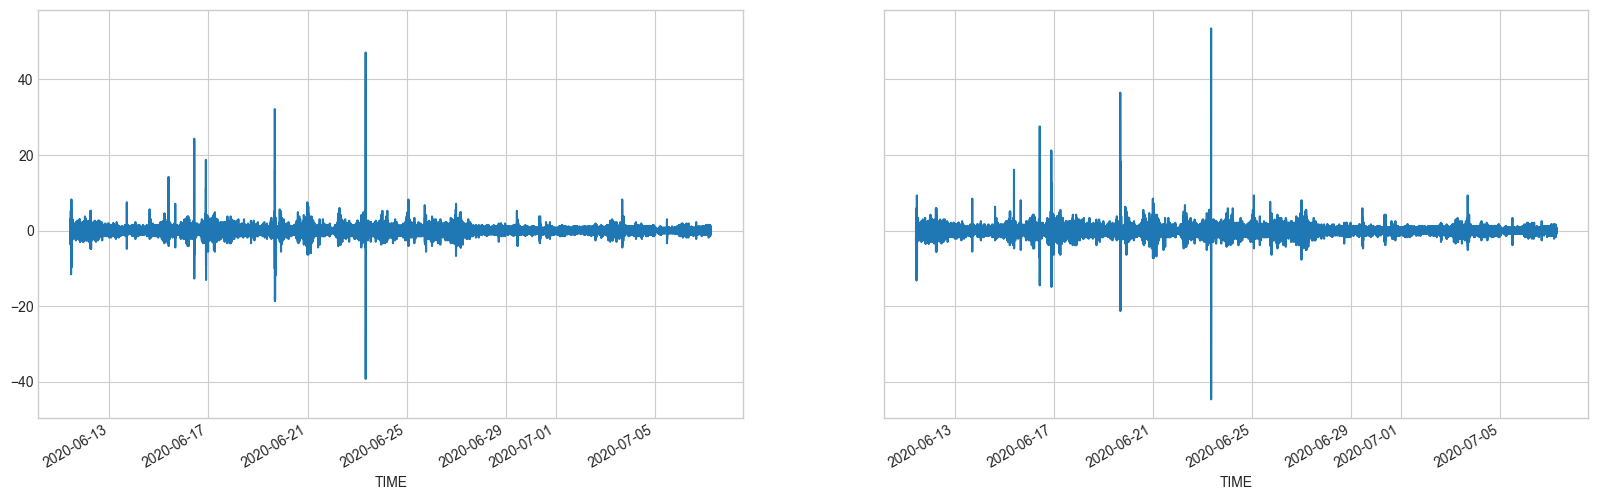

In [86]:
f, ax = plt.subplots(1, 2, sharey=True)
f.set_size_inches(20, 6)

normalized = (roll_diff - roll_diff.mean()) / roll_diff.std()
normalized.plot(ax=ax[0])

central_stats = central.mean(), central.std()
normalized_central = (roll_diff - central_stats[0]) / central_stats[1]


normalized_central.plot(ax=ax[1])

Not a huge difference, at least in this one. TODO investigate with other sensors.

In [87]:
np.abs(normalized_central)

TIME
2020-06-11 10:30:24+00:00         NaN
2020-06-11 10:31:24+00:00    1.755504
2020-06-11 10:32:24+00:00    3.030256
2020-06-11 10:33:24+00:00    1.755504
2020-06-11 10:34:24+00:00    1.218920
                               ...   
2020-07-07 06:20:03+00:00    0.794002
2020-07-07 06:21:05+00:00    0.480751
2020-07-07 06:22:06+00:00    0.055833
2020-07-07 06:23:09+00:00    0.055833
2020-07-07 06:24:09+00:00    0.055833
Name: PMS5003_PM_25, Length: 36788, dtype: float64

In [88]:
[(cutoff, (abs(normalized_central) > cutoff).mean()) for cutoff in range(21)]

[(0, 0.9986136783733827),
 (1, 0.1888387517668805),
 (2, 0.051076437968902905),
 (3, 0.01500489289985865),
 (4, 0.005055996520604545),
 (5, 0.003044471023159726),
 (6, 0.0018756116124823312),
 (7, 0.0014678699575948679),
 (8, 0.0011416766336848972),
 (9, 0.0008970316407524193),
 (10, 0.0007883005327824291),
 (11, 0.0006523866478199413),
 (12, 0.0005708383168424486),
 (13, 0.0005436555398499511),
 (14, 0.0004621072088724584),
 (15, 0.0002990105469174731),
 (16, 0.0002990105469174731),
 (17, 0.00027182776992497554),
 (18, 0.00027182776992497554),
 (19, 0.00024464499293247796),
 (20, 0.00021746221593998044)]

In [89]:
[(cutoff, (abs(normalized_central) > cutoff).sum()) for cutoff in range(21)]

[(0, 36737),
 (1, 6947),
 (2, 1879),
 (3, 552),
 (4, 186),
 (5, 112),
 (6, 69),
 (7, 54),
 (8, 42),
 (9, 33),
 (10, 29),
 (11, 24),
 (12, 21),
 (13, 20),
 (14, 17),
 (15, 11),
 (16, 11),
 (17, 10),
 (18, 10),
 (19, 9),
 (20, 8)]

I'm going to take $5\sigma$, $105\sigma$ and $205\sigma$ diff as cutoffs, and test that for different rolling window widths.

Eg: number of diffs over 5 (or under < 5) in a single hour:

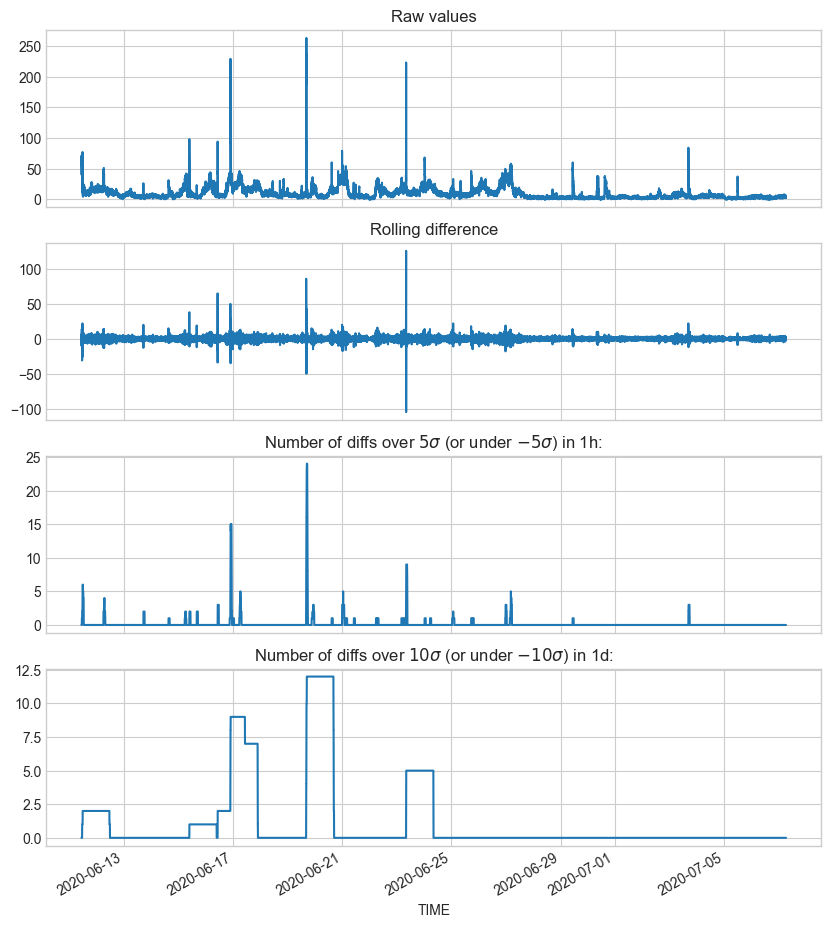

In [90]:
f, ax = plt.subplots(4,1, sharex=True)
f.set_size_inches(10, 12)

test_case["PMS5003_PM_25"].plot(ax=ax[0])
ax[0].set_title("Raw values")

roll_diff.plot(ax=ax[1])
ax[1].set_title("Rolling difference")

sigma = 5
period = "1h"
(abs(normalized_central) > sigma).rolling(period).sum().plot(ax=ax[2])  
ax[2].set_title(f"Number of diffs over ${sigma}\sigma$ (or under $-{sigma}\sigma$) in {period}:")

sigma = 10
period = "1d"
(abs(normalized_central) > sigma).rolling(period).sum().plot(ax=ax[3])  
ax[3].set_title(f"Number of diffs over ${sigma}\sigma$ (or under $-{sigma}\sigma$) in {period}:");

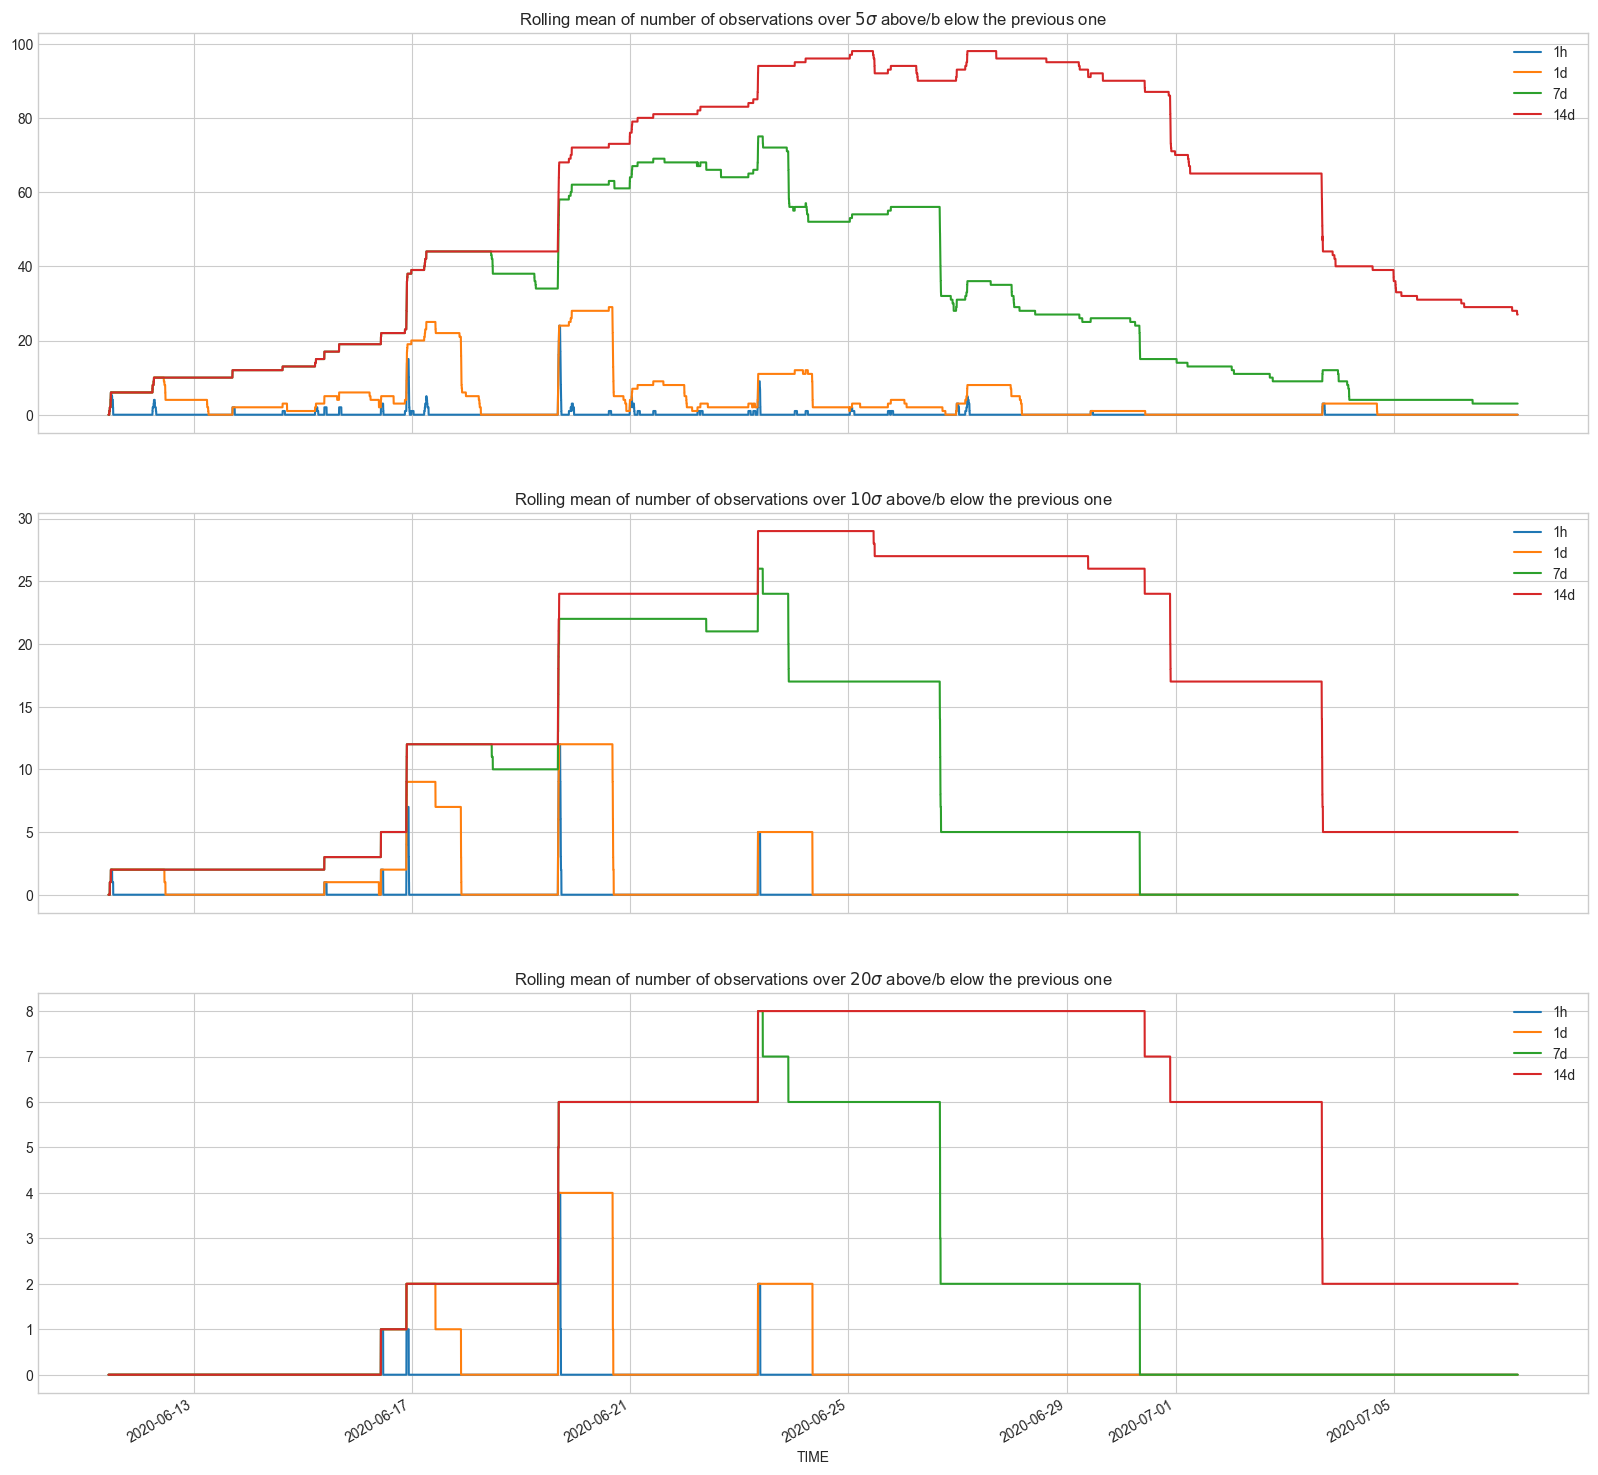

In [91]:
cutoffs = [5, 10, 20]
window_widths = ["1h", "1d", "7d", "14d"]

f, ax = plt.subplots(len(cutoffs), sharex=True)
f.set_size_inches(20,20)

for ix, cutoff in enumerate(cutoffs):
    
    temp = pd.DataFrame()
    
    for width in window_widths:
        temp[width] = (abs(normalized_central) > cutoff).rolling(width).sum()
    
    temp.plot(ax=ax[ix], title=f"Rolling mean of number of observations over ${cutoff}\sigma$ above/b elow the previous one")


That's neat. I think this method shows promise. Need to check more devices, and compare known good and known bad ones. I think high low sigma/high width (eg $5\sigma$ / $7d$, first plot in green ) can be complementary with sigma/low width (eg $10\sigma$/ $1h$, second plot blue): the first one will find very specific moments of clear misbehavior while the second can allow us to detect trends over time.

#### Testing rolling count with more sensors

In [92]:
for name, df in samples.items():
    if "PMS5003_PM_25" in df.columns:
        print(name)

SAMPLES/13168.csv
SAMPLES/13169.csv
SAMPLES/12985.csv
SAMPLES/9606.csv
SAMPLES/13170.csv
SAMPLES/13171.csv
SAMPLES/13167.csv
SAMPLES/13172.csv


In [93]:
def normalize_central(series, pct=0.01):

    central = series[((series > series.quantile(pct)) | (series > series.quantile(1 - pct)))]
    normalized = (series - central.mean()) / central.std()

    return normalized

SAMPLES/13168.csv
SAMPLES/13169.csv
SAMPLES/12985.csv
SAMPLES/9606.csv
SAMPLES/13170.csv
SAMPLES/13171.csv
SAMPLES/13167.csv
SAMPLES/13172.csv
CPU times: user 1min 22s, sys: 1.29 s, total: 1min 23s
Wall time: 1min 25s


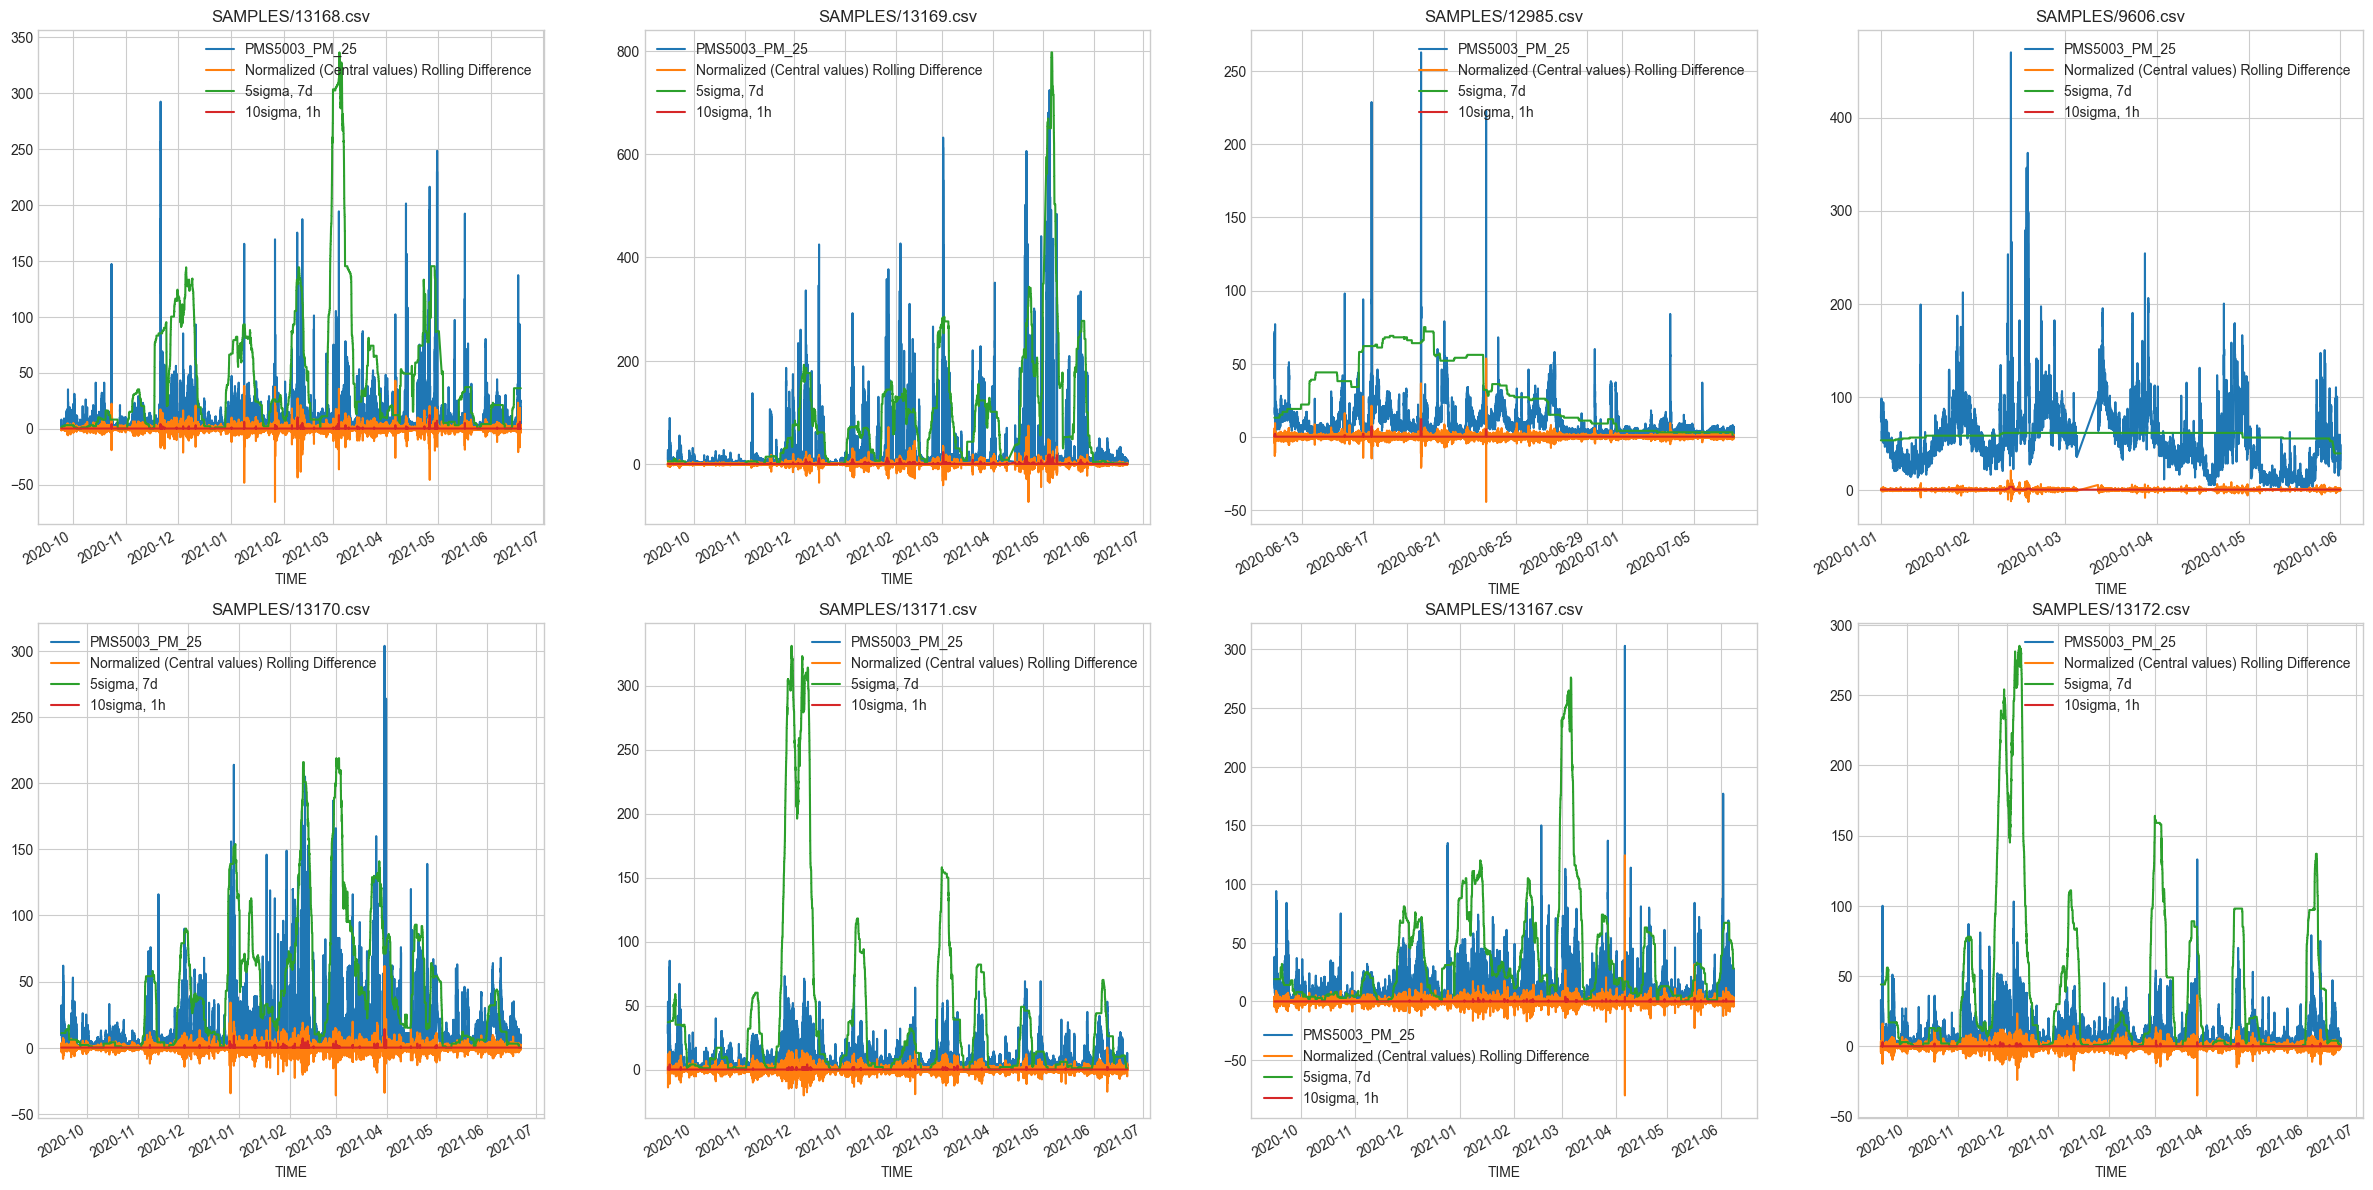

In [94]:
%%time

f, axes = plt.subplots(2, 4)
f.set_size_inches(30, 16)

for i, (name, df) in enumerate(samples.items()):
    print(name)
    temp = pd.DataFrame()
    
    if "PMS5003_PM_25" in df.columns:
        temp["PMS5003_PM_25"] = df["PMS5003_PM_25"]
        
        roll_diff = rolling_difference(df["PMS5003_PM_25"])
        norm_roll_diff = normalize_central(roll_diff)

        temp["Normalized (Central values) Rolling Difference"] = norm_roll_diff
        temp["5sigma, 7d"] = (abs(norm_roll_diff) > 5).rolling("7d", center=True).sum()
        temp["10sigma, 1h"] = (abs(norm_roll_diff) > 10).rolling("1h", center=True).sum()

        #temp = temp / temp.max()  ## Normalize to see something in the shared graphs
        temp.plot(ax = axes[i // 4, i % 4], title=name)
    

SAMPLES/13168.csv
SAMPLES/13169.csv
SAMPLES/12985.csv
SAMPLES/9606.csv
SAMPLES/13170.csv
SAMPLES/13171.csv
SAMPLES/13167.csv
SAMPLES/13172.csv
CPU times: user 1min 23s, sys: 1.44 s, total: 1min 25s
Wall time: 1min 27s


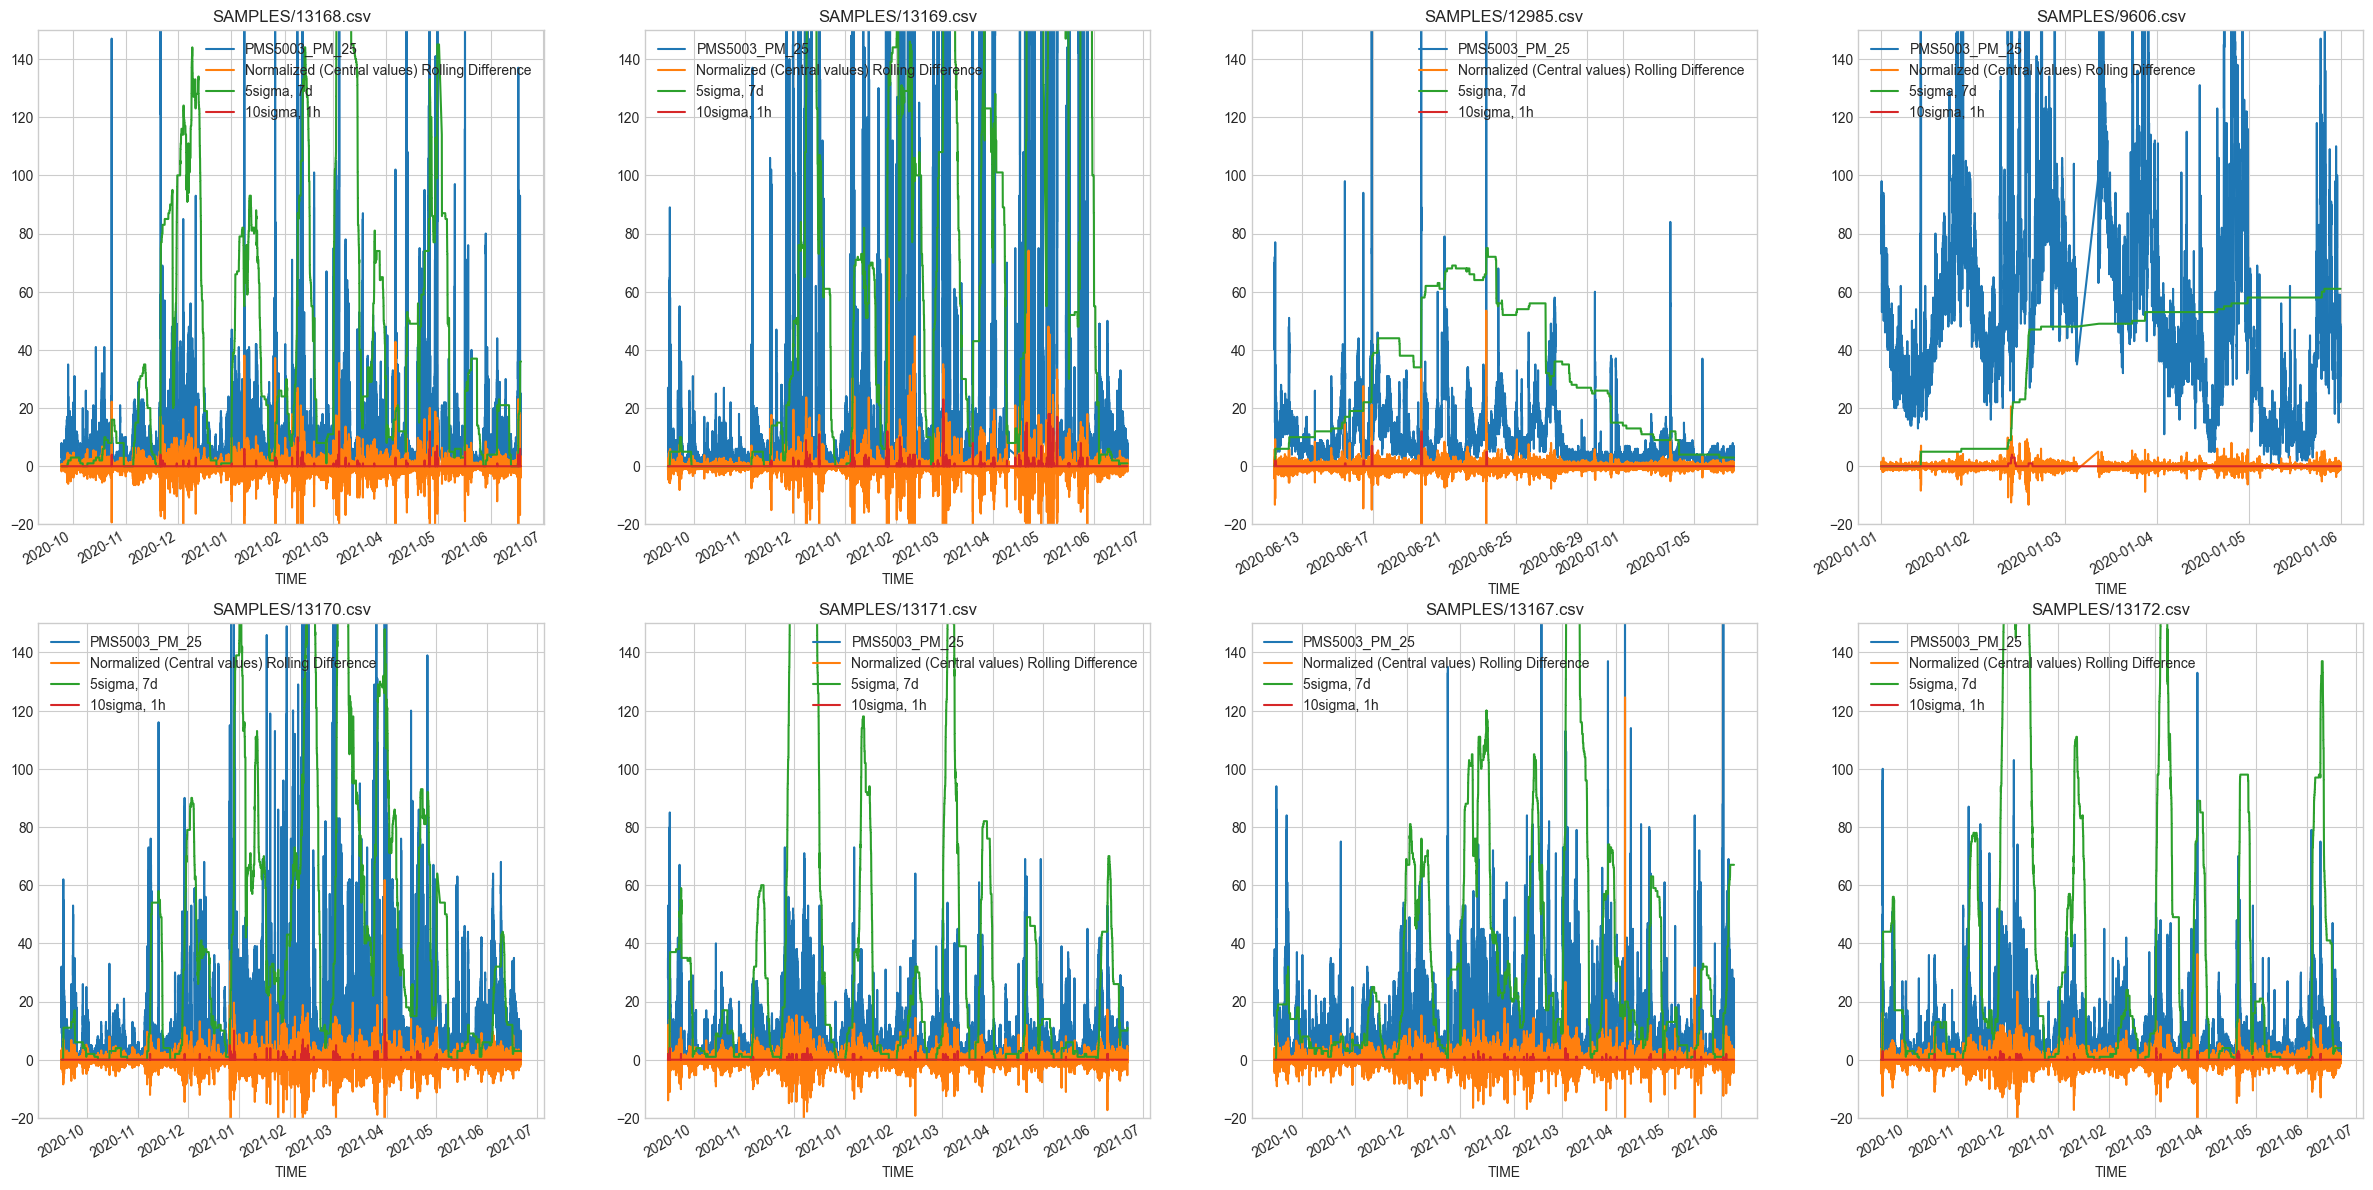

In [95]:
%%time

f, axes = plt.subplots(2, 4)
f.set_size_inches(30, 16)

for i, (name, df) in enumerate(samples.items()):
    print(name)
    temp = pd.DataFrame()
    
    if "PMS5003_PM_25" in df.columns:
        temp["PMS5003_PM_25"] = df["PMS5003_PM_25"]
        
        roll_diff = rolling_difference(df["PMS5003_PM_25"])
        norm_roll_diff = normalize_central(roll_diff)

        temp["Normalized (Central values) Rolling Difference"] = norm_roll_diff
        temp["5sigma, 7d"] = (abs(norm_roll_diff) > 5).rolling("7d").sum()
        temp["10sigma, 1h"] = (abs(norm_roll_diff) > 10).rolling("1h").sum()
    
    #temp = temp / temp.max()  ## Normalize to see something in the shared graphs
    temp.plot(ax = axes[i // 4, i % 4], title=name, ylim=(-20, 150))
    

Mmmmm let's go back to the same ones we were looking at earlier

SAMPLES/13168.csv
SAMPLES/13169.csv
SAMPLES/12985.csv
SAMPLES/9606.csv
SAMPLES/13170.csv
SAMPLES/13171.csv
SAMPLES/13167.csv
SAMPLES/13172.csv
CPU times: user 31.2 s, sys: 433 ms, total: 31.6 s
Wall time: 31.5 s


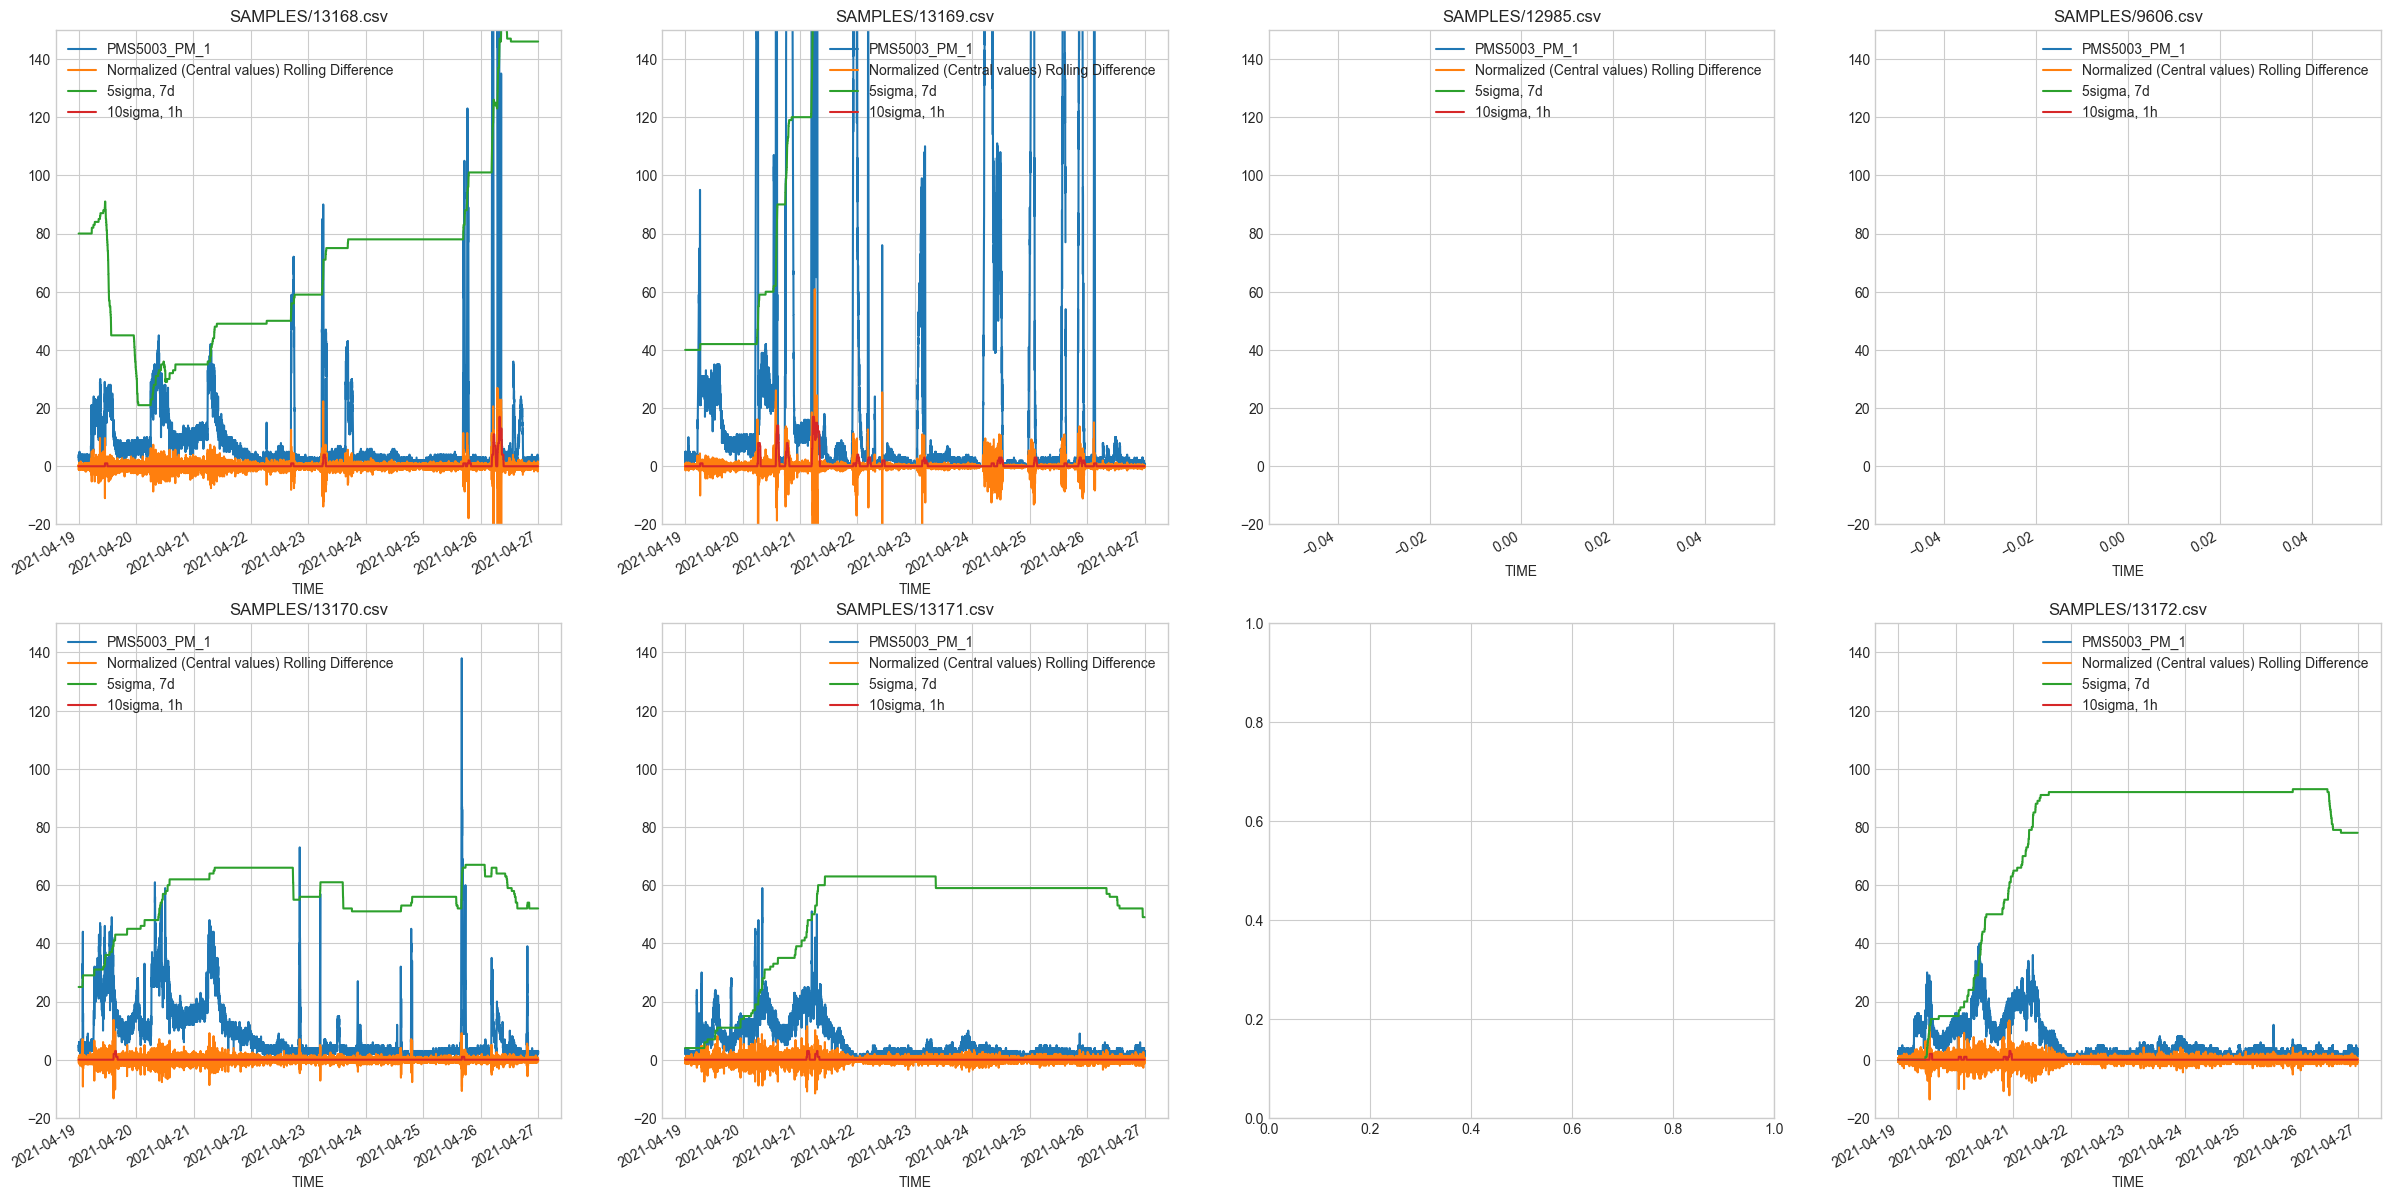

In [96]:
%%time

f, axes = plt.subplots(2, 4)
f.set_size_inches(30, 16)

for i, (name, df) in enumerate(samples.items()):
    print(name)
    temp = pd.DataFrame()
    
    if "PMS5003_PM_1" in df.columns:

        temp["PMS5003_PM_1"] = df["PMS5003_PM_1"]
        
        roll_diff = rolling_difference(df["PMS5003_PM_1"])
        norm_roll_diff = normalize_central(roll_diff)

        temp["Normalized (Central values) Rolling Difference"] = norm_roll_diff
        temp["5sigma, 7d"] = (abs(norm_roll_diff) > 5).rolling("7d").sum()
        temp["10sigma, 1h"] = (abs(norm_roll_diff) > 10).rolling("1h").sum()

        temp["2021-04-19":"2021-04-26"].plot(ax = axes[i // 4, i % 4], title=name, ylim=(-20, 150))  ## calculate values over the whole period, plot only for a week
    

### Testing for stuck values

Some sensors return a fixed value for a long time. Rather than look for magic values (99, 1000, -999, 255...) I think it's better to just derive the stuckness from the data.

<Axes: xlabel='TIME'>

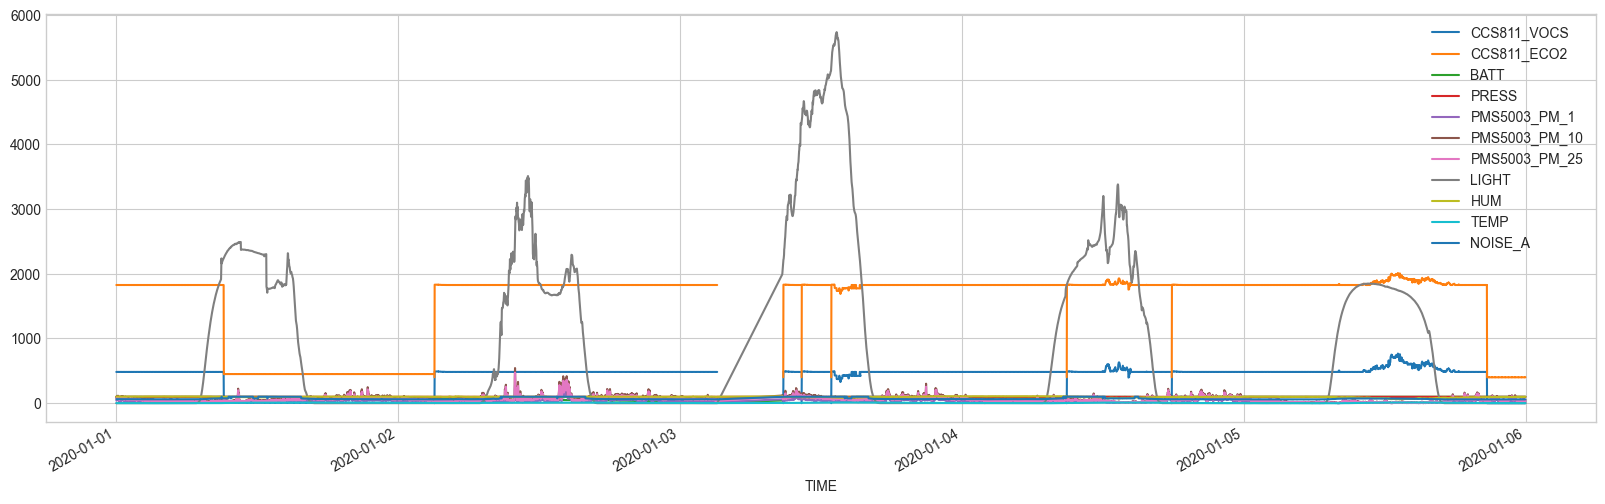

In [97]:
f, axes = plt.subplots(1,1)
f.set_size_inches(20, 6)
samples["SAMPLES/9606.csv"].plot(ax=axes)

<Axes: xlabel='TIME'>

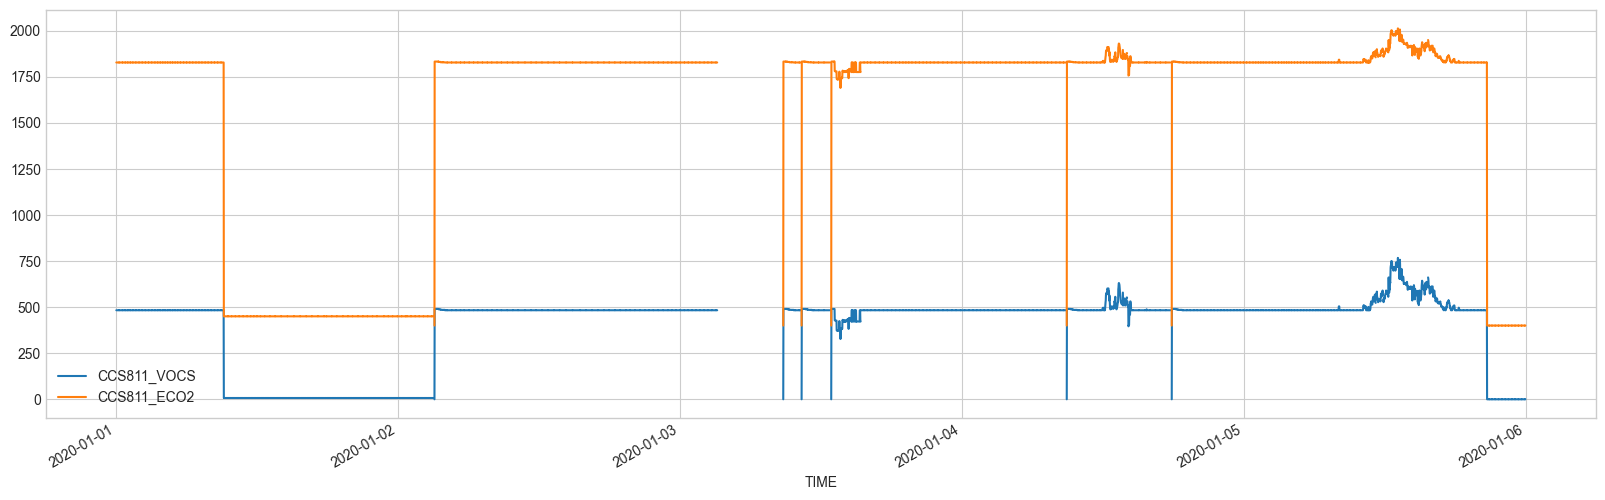

In [98]:
f, axes = plt.subplots(1,1)
f.set_size_inches(20, 6)
samples["SAMPLES/9606.csv"][['CCS811_VOCS', 'CCS811_ECO2']].plot(ax=axes)

In [99]:
data = samples["SAMPLES/9606.csv"][['CCS811_VOCS', 'CCS811_ECO2', "LIGHT"]]

In [100]:
for column in data:
    print(column)
    data[column].value_counts()
    


CCS811_VOCS
CCS811_ECO2
LIGHT


In [101]:
light = data["LIGHT"]

ignore_values=0.0

light == ignore_values

TIME
2020-01-01 00:00:43+00:00    True
2020-01-01 00:01:44+00:00    True
2020-01-01 00:02:45+00:00    True
2020-01-01 00:03:46+00:00    True
2020-01-01 00:04:47+00:00    True
                             ... 
2020-01-05 23:55:27+00:00    True
2020-01-05 23:56:28+00:00    True
2020-01-05 23:57:29+00:00    True
2020-01-05 23:58:30+00:00    True
2020-01-05 23:59:31+00:00    True
Name: LIGHT, Length: 6713, dtype: bool

In [102]:
light.name

'LIGHT'

In [103]:
value = 0.0
light.where(light!=value, np.random.random(size=light.size))

TIME
2020-01-01 00:00:43+00:00    0.607952
2020-01-01 00:01:44+00:00    0.975473
2020-01-01 00:02:45+00:00    0.727266
2020-01-01 00:03:46+00:00    0.546771
2020-01-01 00:04:47+00:00    0.696976
                               ...   
2020-01-05 23:55:27+00:00    0.484493
2020-01-05 23:56:28+00:00    0.798676
2020-01-05 23:57:29+00:00    0.828300
2020-01-05 23:58:30+00:00    0.809300
2020-01-05 23:59:31+00:00    0.498978
Name: LIGHT, Length: 6713, dtype: float64

In [104]:
def mode_count(series: pd.Series, ignore_zeroes=True) -> int:
    '''Count the number of times the most common value appears in series,
    ignoring zeroes. Optionally, specify a value to ignore for the count. Useful for zero.'''
    
    if ignore_zeroes:
        series = series.where(series!=0.0, np.random.random(size=series.size))  # Replace zeroes with random so that they don't impact value count
        
    return series.value_counts().iloc[0]


mode_count(data["CCS811_ECO2"])

4240

In [105]:
mode_count(data["LIGHT"])

23

In [106]:
mode_count(data["LIGHT"], ignore_zeroes=True)

23

In [107]:
mode_count(data["LIGHT"], ignore_zeroes=False)

3845

In [108]:
data = samples["SAMPLES/9606.csv"][['CCS811_VOCS', 'CCS811_ECO2', "LIGHT"]]

r = data.rolling("1h")
r.apply(mode_count, raw=False)

CCS811_VOCS  CCS811_ECO2  LIGHT
TIME                                                      
2020-01-01 00:00:43+00:00          1.0          1.0    1.0
2020-01-01 00:01:44+00:00          2.0          2.0    1.0
2020-01-01 00:02:45+00:00          3.0          3.0    1.0
2020-01-01 00:03:46+00:00          4.0          4.0    1.0
2020-01-01 00:04:47+00:00          5.0          5.0    1.0
...                                ...          ...    ...
2020-01-05 23:55:27+00:00          1.0         57.0    1.0
2020-01-05 23:56:28+00:00          1.0         56.0    1.0
2020-01-05 23:57:29+00:00          1.0         56.0    1.0
2020-01-05 23:58:30+00:00          1.0         56.0    1.0
2020-01-05 23:59:31+00:00          1.0         56.0    1.0

[6713 rows x 3 columns]

<Axes: title={'center': 'Count of 1h stuck values'}, xlabel='TIME'>

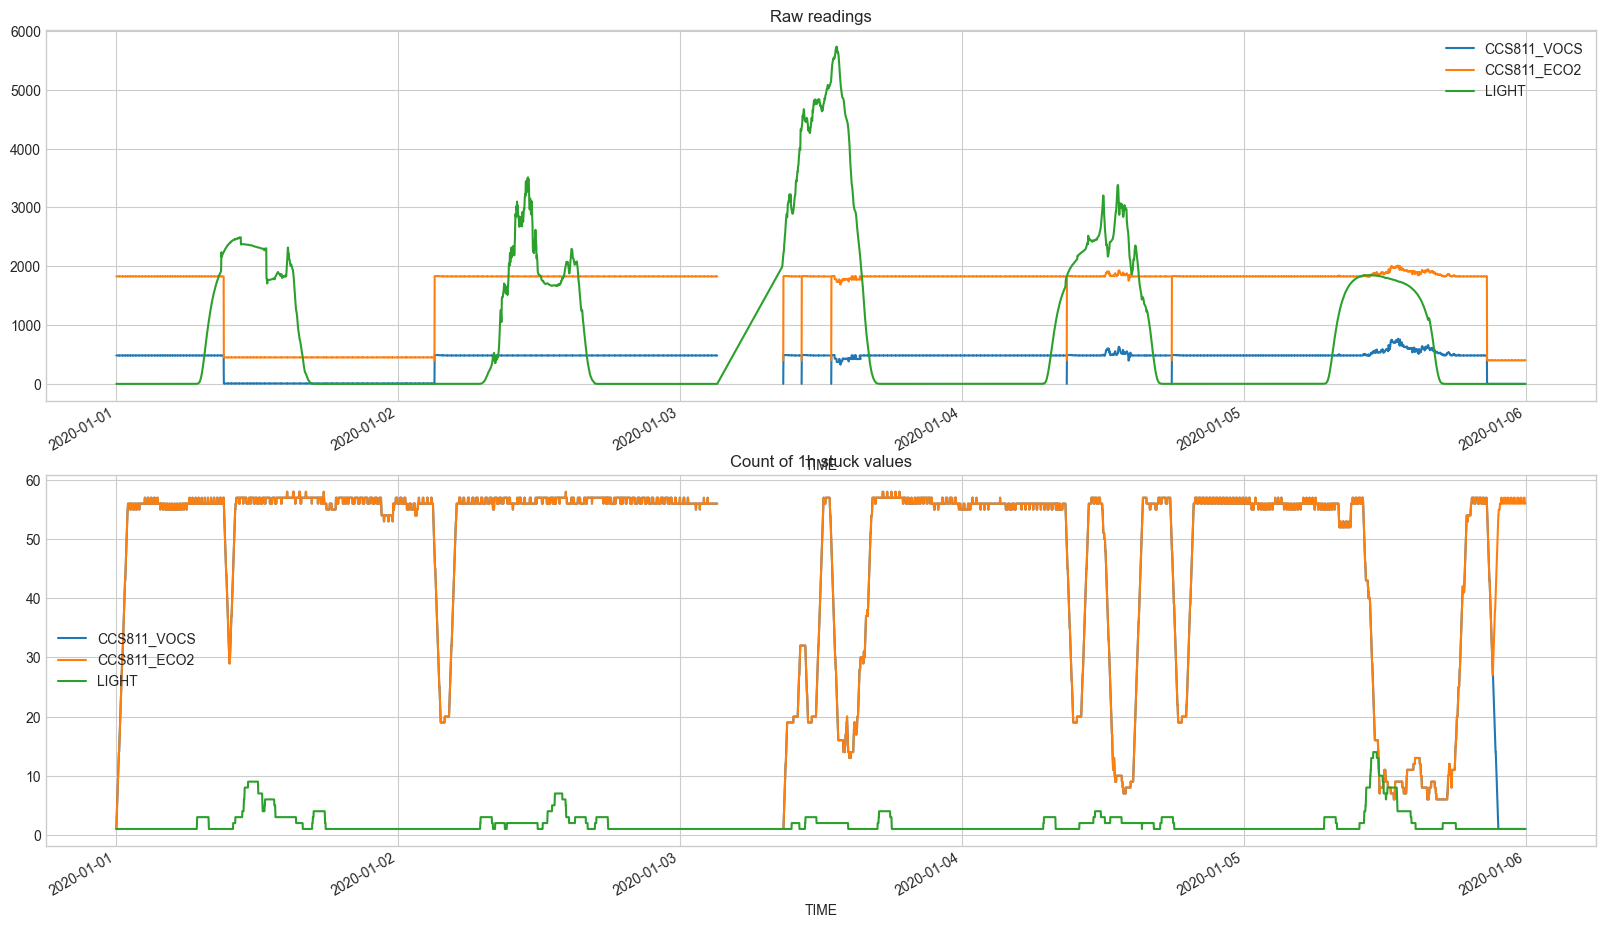

In [109]:
f, axes = plt.subplots(2,1)
f.set_size_inches(20, 12)

data = samples["SAMPLES/9606.csv"][['CCS811_VOCS', 'CCS811_ECO2', "LIGHT"]]
axes[0].set_title("Raw readings")
data.plot(ax=axes[0])

r = data.rolling("1h")
axes[1].set_title("Count of 1h stuck values")
r.apply(mode_count).plot(ax=axes[1])

### NAs

Need to consider both present NAs and also those that never made it into the data.

#### Test case

There is a big gap in the data, some NAs...

<Axes: xlabel='TIME'>

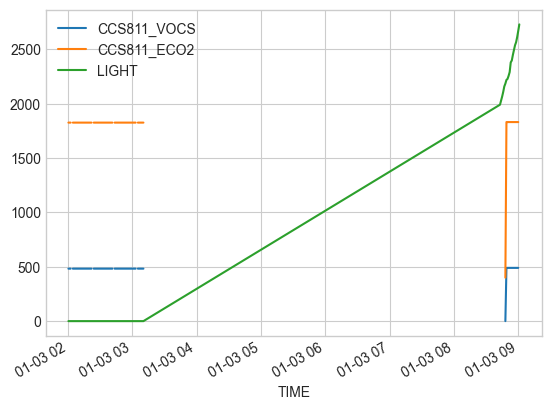

In [110]:
data = samples["SAMPLES/9606.csv"][['CCS811_VOCS', 'CCS811_ECO2', "LIGHT"]]

test_case = data["2020-01-03 2:00":"2020-01-03 9:00"]
test_case.plot()

In [111]:
pd.options.display.max_rows = None

test_case["2020-01-03 2:00":"2020-01-03 9:00"] 

CCS811_VOCS  CCS811_ECO2   LIGHT
TIME                                                       
2020-01-03 02:00:34+00:00        483.0       1827.0     0.0
2020-01-03 02:01:36+00:00        483.0       1827.0     0.0
2020-01-03 02:02:38+00:00        483.0       1827.0     0.0
2020-01-03 02:03:40+00:00          NaN          NaN     0.0
2020-01-03 02:04:42+00:00        483.0       1827.0     0.0
2020-01-03 02:05:44+00:00        483.0       1827.0     0.0
2020-01-03 02:06:46+00:00        483.0       1827.0     0.0
2020-01-03 02:07:48+00:00        483.0       1827.0     0.0
2020-01-03 02:08:48+00:00        483.0       1827.0     0.0
2020-01-03 02:09:49+00:00        483.0       1827.0     0.0
2020-01-03 02:10:51+00:00        483.0       1827.0     0.0
2020-01-03 02:11:53+00:00        483.0       1827.0     0.0
2020-01-03 02:12:55+00:00        483.0       1827.0     0.0
2020-01-03 02:13:55+00:00        483.0       1827.0     0.0
2020-01-03 02:14:55+00:00        483.0       1827.0     0.0
2020-01-03 02:15:58+00:00        483.0       1827.0     0.0
2020-01-03 02:17:00+00:00        483.0       1827.0     0.0
2020-01-03 02:18:02+00:00        483.0       1827.0     0.0
2020-01-03 02:19:02+00:00        483.0       1827.0     0.0
2020-01-03 02:20:03+00:00        483.0       1827.0     0.0
2020-01-03 02:21:05+00:00        483.0       1827.0     0.0
2020-01-03 02:22:07+00:00        483.0       1827.0     0.0
2020-01-03 02:23:08+00:00          NaN          NaN     0.0
2020-01-03 02:24:10+00:00        483.0       1827.0     0.0
2020-01-03 02:25:12+00:00        483.0       1827.0     0.0
2020-01-03 02:26:14+00:00        483.0       1827.0     0.0
2020-01-03 02:27:14+00:00        483.0       1827.0     0.0
2020-01-03 02:28:15+00:00        483.0       1827.0     0.0
2020-01-03 02:29:17+00:00        483.0       1827.0     0.0
2020-01-03 02:30:19+00:00        483.0       1827.0     0.0
2020-01-03 02:31:20+00:00        483.0       1827.0     0.0
2020-01-03 02:32:22+00:00        483.0       1827.0     0.0
2020-01-03 02:33:24+00:00        483.0       1827.0     0.0
2020-01-03 02:34:26+00:00        483.0       1827.0     0.0
2020-01-03 02:35:26+00:00        483.0       1827.0     0.0
2020-01-03 02:36:27+00:00        483.0       1827.0     0.0
2020-01-03 02:37:29+00:00        483.0       1827.0     0.0
2020-01-03 02:38:31+00:00        483.0       1827.0     0.0
2020-01-03 02:39:33+00:00        483.0       1827.0     0.0
2020-01-03 02:40:33+00:00        483.0       1827.0     0.0
2020-01-03 02:41:34+00:00        483.0       1827.0     0.0
2020-01-03 02:42:37+00:00          NaN          NaN     0.0
2020-01-03 02:43:39+00:00        483.0       1827.0     0.0
2020-01-03 02:44:41+00:00        483.0       1827.0     0.0
2020-01-03 02:45:41+00:00        483.0       1827.0     0.0
2020-01-03 02:46:42+00:00        483.0       1827.0     0.0
2020-01-03 02:47:44+00:00        483.0       1827.0     0.0
2020-01-03 02:48:46+00:00        483.0       1827.0     0.0
2020-01-03 02:49:49+00:00        483.0       1827.0     0.0
2020-01-03 02:50:51+00:00        483.0       1827.0     0.0
2020-01-03 02:51:54+00:00        483.0       1827.0     0.0
2020-01-03 02:52:56+00:00        483.0       1827.0     0.0
2020-01-03 02:53:59+00:00        483.0       1827.0     0.0
2020-01-03 02:55:01+00:00        483.0       1827.0     0.0
2020-01-03 02:56:02+00:00        483.0       1827.0     0.0
2020-01-03 02:57:02+00:00        483.0       1827.0     0.0
2020-01-03 02:58:04+00:00        483.0       1827.0     0.0
2020-01-03 02:59:06+00:00        483.0       1827.0     0.0
2020-01-03 03:00:08+00:00        483.0       1827.0     0.0
2020-01-03 03:01:11+00:00        483.0       1827.0     0.0
2020-01-03 03:02:13+00:00        483.0       1827.0     0.0
2020-01-03 03:03:15+00:00        483.0       1827.0     0.0
2020-01-03 03:04:17+00:00          NaN          NaN     0.0
2020-01-03 03:05:20+00:00        483.0       1827.0     0.0
2020-01-03 03:06:23+00:00        483.0       1827.0     0.0
2020-01

#### Need to infer the sampling frequency of the data 

If it is not specified

`pd_infer_freq` looked promising but doesn't work with these series:

In [112]:
series = data["CCS811_ECO2"]

pd.infer_freq(series.index)  # Returns None

In [113]:
test_case.index.diff().value_counts()  # Alternative approach

TIME
0 days 00:01:02    42
0 days 00:01:00    27
0 days 00:01:01     9
0 days 00:01:03     8
0 days 05:32:27     1
Name: count, dtype: int64

In [114]:
td = test_case.index.diff().value_counts().index[0]
td

Timedelta('0 days 00:01:02')

In [115]:
td / pd.Timedelta("1min")

1.0333333333333334

In [116]:
round (td / pd.Timedelta("1min"))

1

In [117]:
import logging

def infer_sampling_rate(series: pd.Series):
    '''Infer the sampling rate of the given timeseries, rounded to the 
    closest minute.
    '''
    
    time_differences = series.index.diff().value_counts()
    most_common = time_differences.index[0]
    
    minutes = most_common / pd.Timedelta("1min")
    integer_minutes = round(minutes)
    
    if abs(integer_minutes - minutes) > 0.05:
        # Consider: should we return None here?
        logging.warning('Rounded a time difference with more than 5% error')
        
    return pd.Timedelta(integer_minutes, unit="min")


infer_sampling_rate(test_case)

Timedelta('0 days 00:01:00')

In [118]:
frequency_minutes = infer_sampling_rate(test_case)

test_case.resample(frequency_minutes).mean()[:100]

CCS811_VOCS  CCS811_ECO2  LIGHT
TIME                                                      
2020-01-03 02:00:00+00:00        483.0       1827.0    0.0
2020-01-03 02:01:00+00:00        483.0       1827.0    0.0
2020-01-03 02:02:00+00:00        483.0       1827.0    0.0
2020-01-03 02:03:00+00:00          NaN          NaN    0.0
2020-01-03 02:04:00+00:00        483.0       1827.0    0.0
2020-01-03 02:05:00+00:00        483.0       1827.0    0.0
2020-01-03 02:06:00+00:00        483.0       1827.0    0.0
2020-01-03 02:07:00+00:00        483.0       1827.0    0.0
2020-01-03 02:08:00+00:00        483.0       1827.0    0.0
2020-01-03 02:09:00+00:00        483.0       1827.0    0.0
2020-01-03 02:10:00+00:00        483.0       1827.0    0.0
2020-01-03 02:11:00+00:00        483.0       1827.0    0.0
2020-01-03 02:12:00+00:00        483.0       1827.0    0.0
2020-01-03 02:13:00+00:00        483.0       1827.0    0.0
2020-01-03 02:14:00+00:00        483.0       1827.0    0.0
2020-01-03 02:15:00+00:00        483.0       1827.0    0.0
2020-01-03 02:16:00+00:00          NaN          NaN    NaN
2020-01-03 02:17:00+00:00        483.0       1827.0    0.0
2020-01-03 02:18:00+00:00        483.0       1827.0    0.0
2020-01-03 02:19:00+00:00        483.0       1827.0    0.0
2020-01-03 02:20:00+00:00        483.0       1827.0    0.0
2020-01-03 02:21:00+00:00        483.0       1827.0    0.0
2020-01-03 02:22:00+00:00        483.0       1827.0    0.0
2020-01-03 02:23:00+00:00          NaN          NaN    0.0
2020-01-03 02:24:00+00:00        483.0       1827.0    0.0
2020-01-03 02:25:00+00:00        483.0       1827.0    0.0
2020-01-03 02:26:00+00:00        483.0       1827.0    0.0
2020-01-03 02:27:00+00:00        483.0       1827.0    0.0
2020-01-03 02:28:00+00:00        483.0       1827.0    0.0
2020-01-03 02:29:00+00:00        483.0       1827.0    0.0
2020-01-03 02:30:00+00:00        483.0       1827.0    0.0
2020-01-03 02:31:00+00:00        483.0       1827.0    0.0
2020-01-03 02:32:00+00:00        483.0       1827.0    0.0
2020-01-03 02:33:00+00:00        483.0       1827.0    0.0
2020-01-03 02:34:00+00:00        483.0       1827.0    0.0
2020-01-03 02:35:00+00:00        483.0       1827.0    0.0
2020-01-03 02:36:00+00:00        483.0       1827.0    0.0
2020-01-03 02:37:00+00:00        483.0       1827.0    0.0
2020-01-03 02:38:00+00:00        483.0       1827.0    0.0
2020-01-03 02:39:00+00:00        483.0       1827.0    0.0
2020-01-03 02:40:00+00:00        483.0       1827.0    0.0
2020-01-03 02:41:00+00:00        483.0       1827.0    0.0
2020-01-03 02:42:00+00:00          NaN          NaN    0.0
2020-01-03 02:43:00+00:00        483.0       1827.0    0.0
2020-01-03 02:44:00+00:00        483.0       1827.0    0.0
2020-01-03 02:45:00+00:00        483.0       1827.0    0.0
2020-01-03 02:46:00+00:00        483.0       1827.0    0.0
2020-01-03 02:47:00+00:00        483.0       1827.0    0.0
2020-01-03 02:48:00+00:00        483.0       1827.0    0.0
2020-01-03 02:49:00+00:00        483.0       1827.0    0.0
2020-01-03 02:50:00+00:00        483.0       1827.0    0.0
2020-01-03 02:51:00+00:00        483.0       1827.0    0.0
2020-01-03 02:52:00+00:00        483.0       1827.0    0.0
2020-01-03 02:53:00+00:00        483.0       1827.0    0.0
2020-01-03 02:54:00+00:00          NaN          NaN    NaN
2020-01-03 02:55:00+00:00        483.0       1827.0    0.0
2020-01-03 02:56:00+00:00        483.0       1827.0    0.0
2020-01-03 02:57:00+00:00        483.0       1827.0    0.0
2020-01-03 02:58:00+00:00        483.0       1827.0    0.0
2020-01-03 02:59:00+00:00        483.0       1827.0    0.0
2020-01-03 03:00:00+00:00        483.0       1827.0    0.0
2020-01-03 03:01:00+00:00        483.0       1827.0    0.0
2020-01-03 03:02:00+00:00        483.0       1827.0    0.0
2020-01-03 03:03:00+00:00        483.0       1827.0    0.0
2020-01-03 03:04:00+00:00          NaN          NaN    0.0
2020-01-03 03:05:00+00:00        483.0       1827.0    0.0
2020-01-03 03:0

In [119]:
pd.options.display.max_rows = None

def count_nas(series: pd.Series) -> int:
    return series.isna().sum()

In [120]:
frequency_minutes = infer_sampling_rate(test_case)
period = "1h"
max_count = frequency_minutes / pd.Timedelta(period)
counts = test_case.resample(frequency_minutes).mean()  # Need to aggregate somehow

counts.rolling(period).apply(count_nas).fillna(max_count)  # If we didn't fillna, we would get a nan number of nas when the whole period is nan.

CCS811_VOCS  CCS811_ECO2      LIGHT
TIME                                                          
2020-01-03 02:00:00+00:00     0.000000     0.000000   0.000000
2020-01-03 02:01:00+00:00     0.000000     0.000000   0.000000
2020-01-03 02:02:00+00:00     0.000000     0.000000   0.000000
2020-01-03 02:03:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:04:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:05:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:06:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:07:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:08:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:09:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:10:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:11:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:12:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:13:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:14:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:15:00+00:00     1.000000     1.000000   0.000000
2020-01-03 02:16:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:17:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:18:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:19:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:20:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:21:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:22:00+00:00     2.000000     2.000000   1.000000
2020-01-03 02:23:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:24:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:25:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:26:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:27:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:28:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:29:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:30:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:31:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:32:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:33:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:34:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:35:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:36:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:37:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:38:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:39:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:40:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:41:00+00:00     3.000000     3.000000   1.000000
2020-01-03 02:42:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:43:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:44:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:45:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:46:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:47:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:48:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:49:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:50:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:51:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:52:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:53:00+00:00     4.000000     4.000000   1.000000
2020-01-03 02:54:00+00:00     5.000000     5.000000   2.000000
2020-01-03 02:55:00+00:00     5.000000     5.000000   2.000000
2020-01-03 02:56:00+00:00     5.000000     5.000000   2.000000
2020-01-03 02:57:00+00:00     5.000000     5.000000   2.000000
2020-01-03 02:58:00+00:00     5.000000     5.000000   2.000000
2020-01-03 02:59:00+00:00     5.000000     5.000000   2.000000
2020-01-03 03:00:00+00:00     5.000000     5.000000   2.000000
2020-01-03 03:01:00+00:00     5.000000     5.000000   2.00

<Axes: xlabel='TIME'>

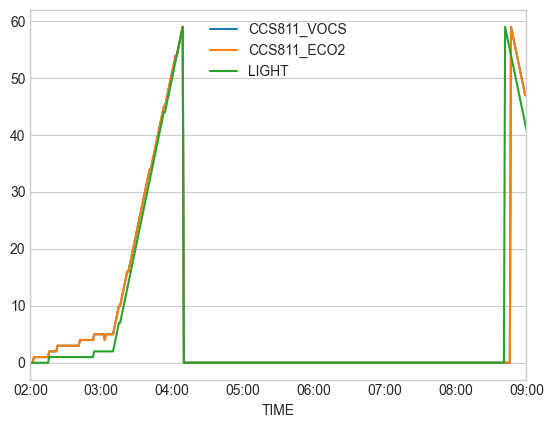

In [121]:
counts.rolling(period).apply(count_nas).fillna(max_count).plot()

In [122]:
def get_nan_ratio(series: pd.Series, period="1h"):

    frequency_minutes = infer_sampling_rate(series)
    max_possible_count = pd.Timedelta(period) / frequency_minutes
    
    counts = series.resample(frequency_minutes).mean()  # Need to aggregate somehow

    nan_count = counts.rolling(period).apply(count_nas).fillna(max_possible_count)  # If we didn't fillna, we would get nas as count when the whole period is missing.
    
    nan_ratio = nan_count / max_possible_count
    
    return nan_ratio

get_nan_ratio(data)

CCS811_VOCS  CCS811_ECO2     LIGHT
TIME                                                         
2020-01-01 00:00:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:01:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:02:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:03:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:04:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:05:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:06:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:07:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:08:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:09:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:10:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:11:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:12:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:13:00+00:00     0.000000     0.000000  0.000000
2020-01-01 00:14:00+00:00     0.016667     0.016667  0.000000
2020-01-01 00:15:00+00:00     0.016667     0.016667  0.000000
2020-01-01 00:16:00+00:00     0.016667     0.016667  0.000000
2020-01-01 00:17:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:18:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:19:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:20:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:21:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:22:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:23:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:24:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:25:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:26:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:27:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:28:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:29:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:30:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:31:00+00:00     0.033333     0.033333  0.016667
2020-01-01 00:32:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:33:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:34:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:35:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:36:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:37:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:38:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:39:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:40:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:41:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:42:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:43:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:44:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:45:00+00:00     0.050000     0.050000  0.016667
2020-01-01 00:46:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:47:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:48:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:49:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:50:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:51:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:52:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:53:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:54:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:55:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:56:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:57:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:58:00+00:00     0.066667     0.066667  0.016667
2020-01-01 00:59:00+00:00     0.083333     0.083333  0.016667
2020-01-01 01:00:00+00:00     0.083333     0.083333  0.016667
2020-01-01 01:01:00+00:00     0.083333     0.083333  0.016667
2020-01-01 01:02:00+00:00     0.083333     0.083333  0.0166

<Axes: title={'center': 'Count of 1h NAs'}, xlabel='TIME'>

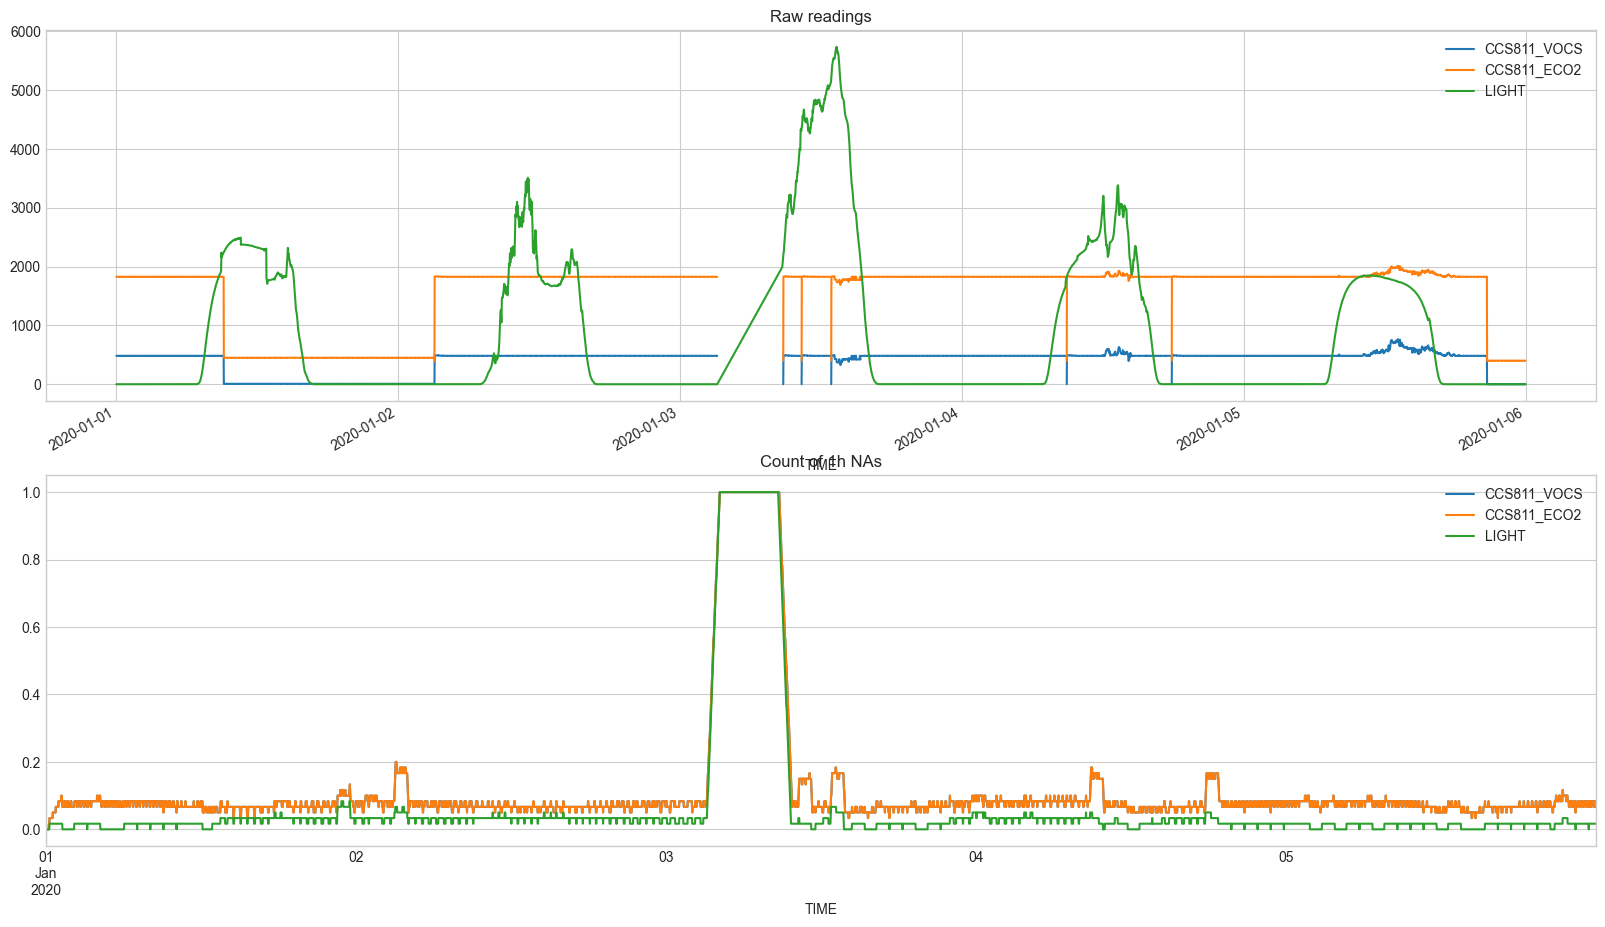

In [123]:
f, axes = plt.subplots(2,1)
f.set_size_inches(20, 12)

data = samples["SAMPLES/9606.csv"][['CCS811_VOCS', 'CCS811_ECO2', "LIGHT"]]
axes[0].set_title("Raw readings")
data.plot(ax=axes[0])

r = data.rolling("1h")
axes[1].set_title("Count of 1h NAs")
get_nan_ratio(data).plot(ax=axes[1])

### Implausible values

#### Sidenote: printing out `scdata.device.device.Device` takes a looooooong time

Should probably not print out the full data loaded.

In [124]:
type(d)

scdata.device.device.Device

#### Plausible values 

There's an existing function in device.py, but it only returns a per day ratio, not a rolling count.

<Axes: >

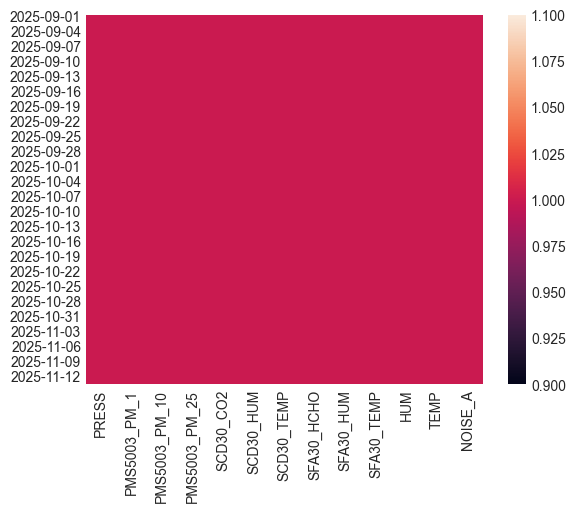

In [125]:
import seaborn as sns

sns.heatmap(pd.DataFrame(d.get_plausible_ratio()))

In [126]:
test_case.columns

Index(['CCS811_VOCS', 'CCS811_ECO2', 'LIGHT'], dtype='object')

In [127]:
from scdata._config import config

config._default_unplausible_values["CCS811_VOCS"]

KeyError: 'CCS811_VOCS'

In [128]:
config._default_unplausible_values

{'NOISE_A': [20, 99],
 'SCD30_CO2': [300, 2000],
 'SCD30_HUM': [20, 99],
 'SCD30_TEMP': [-20, 50],
 'ST LPS33 - Barometric Pressure': [50, 110],
 'PRESS': [50, 110],
 'PMS5003_PM_1': [0, 500],
 'PMS5003_PM_25': [0, 500],
 'PMS5003_PM_10': [0, 500],
 'SEN5X_HUM': [20, 99],
 'SEN5X_PM_1': [0, 500],
 'SEN5X_PM_10': [0, 500],
 'SEN5X_PM_25': [0, 500],
 'SEN5X_PM_40': [0, 500],
 'SEN5X_TEMP': [-20, 50],
 'SFA30_HCHO': [0, 1000],
 'SFA30_HUM': [20, 99],
 'SFA30_TEMP': [-20, 50],
 'ADC_48_0': [0, 3],
 'ADC_48_1': [0, 3],
 'ADC_48_2': [0, 3],
 'ADC_48_3': [0, 3],
 'ADC_49_0': [0, 3],
 'ADC_49_1': [0, 3],
 'ADC_49_2': [0, 3],
 'ADC_49_3': [0, 3],
 'HUM': [20, 99],
 'TEMP': [-20, 50],
 'NO2': [0, 1000],
 'O3': [0, 1000]}

In [131]:
from typing import List

def get_implausible_values(series: pd.Series, plausible_interval:List[int]=None) -> pd.Series:
    '''Scan the series for values outside the plausible interval for the 
    physical magnitude, as defined by plausible_interval or config._default_unplausible_values.
    
    For example, we find values of NOISE_A below 20dB or above 99dB to
    be implausible.'''

    if plausible_interval is not None:    
        left, right = plausible_interval
    elif series.name in config._default_unplausible_values:
        left, right = config._default_unplausible_values[series.name]  # I don't like this name
    else:
        copy = series.copy()
        copy[:] = np.nan
        
        return copy
    
    implausible = (series < left) | (series > right)
    implausible[series.isna()] = None  # Propagate NaNs
    
    return implausible

In [132]:
get_implausible_values(test_case["CCS811_ECO2"])[:25]  # no plausible_values defined

TIME
2020-01-03 02:00:34+00:00   NaN
2020-01-03 02:01:36+00:00   NaN
2020-01-03 02:02:38+00:00   NaN
2020-01-03 02:03:40+00:00   NaN
2020-01-03 02:04:42+00:00   NaN
2020-01-03 02:05:44+00:00   NaN
2020-01-03 02:06:46+00:00   NaN
2020-01-03 02:07:48+00:00   NaN
2020-01-03 02:08:48+00:00   NaN
2020-01-03 02:09:49+00:00   NaN
2020-01-03 02:10:51+00:00   NaN
2020-01-03 02:11:53+00:00   NaN
2020-01-03 02:12:55+00:00   NaN
2020-01-03 02:13:55+00:00   NaN
2020-01-03 02:14:55+00:00   NaN
2020-01-03 02:15:58+00:00   NaN
2020-01-03 02:17:00+00:00   NaN
2020-01-03 02:18:02+00:00   NaN
2020-01-03 02:19:02+00:00   NaN
2020-01-03 02:20:03+00:00   NaN
2020-01-03 02:21:05+00:00   NaN
2020-01-03 02:22:07+00:00   NaN
2020-01-03 02:23:08+00:00   NaN
2020-01-03 02:24:10+00:00   NaN
2020-01-03 02:25:12+00:00   NaN
Name: CCS811_ECO2, dtype: float64

In [133]:
get_implausible_values(test_case["CCS811_ECO2"], [20, 2000])[:25]

/var/folders/zp/8f7jsfk57wv4xty1g8w6r_9c0000gn/T/ipykernel_97158/700568389.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  implausible[series.isna()] = None  # Propagate NaNs


TIME
2020-01-03 02:00:34+00:00    False
2020-01-03 02:01:36+00:00    False
2020-01-03 02:02:38+00:00    False
2020-01-03 02:03:40+00:00      NaN
2020-01-03 02:04:42+00:00    False
2020-01-03 02:05:44+00:00    False
2020-01-03 02:06:46+00:00    False
2020-01-03 02:07:48+00:00    False
2020-01-03 02:08:48+00:00    False
2020-01-03 02:09:49+00:00    False
2020-01-03 02:10:51+00:00    False
2020-01-03 02:11:53+00:00    False
2020-01-03 02:12:55+00:00    False
2020-01-03 02:13:55+00:00    False
2020-01-03 02:14:55+00:00    False
2020-01-03 02:15:58+00:00    False
2020-01-03 02:17:00+00:00    False
2020-01-03 02:18:02+00:00    False
2020-01-03 02:19:02+00:00    False
2020-01-03 02:20:03+00:00    False
2020-01-03 02:21:05+00:00    False
2020-01-03 02:22:07+00:00    False
2020-01-03 02:23:08+00:00      NaN
2020-01-03 02:24:10+00:00    False
2020-01-03 02:25:12+00:00    False
Name: CCS811_ECO2, dtype: object

In [134]:
test_case["CCS811_ECO2"].tail(25)

TIME
2020-01-03 03:05:20+00:00    1827.0
2020-01-03 03:06:23+00:00    1827.0
2020-01-03 03:07:25+00:00    1827.0
2020-01-03 03:08:27+00:00    1827.0
2020-01-03 03:09:29+00:00    1827.0
2020-01-03 03:10:31+00:00    1827.0
2020-01-03 08:42:58+00:00       NaN
2020-01-03 08:43:58+00:00       NaN
2020-01-03 08:44:58+00:00       NaN
2020-01-03 08:45:58+00:00       NaN
2020-01-03 08:46:58+00:00       NaN
2020-01-03 08:47:58+00:00     400.0
2020-01-03 08:48:58+00:00    1832.0
2020-01-03 08:49:58+00:00    1832.0
2020-01-03 08:50:58+00:00    1832.0
2020-01-03 08:51:58+00:00    1832.0
2020-01-03 08:52:58+00:00    1832.0
2020-01-03 08:53:58+00:00    1832.0
2020-01-03 08:54:58+00:00    1832.0
2020-01-03 08:55:58+00:00    1832.0
2020-01-03 08:56:58+00:00    1832.0
2020-01-03 08:57:58+00:00    1832.0
2020-01-03 08:58:58+00:00    1832.0
2020-01-03 08:59:58+00:00    1832.0
2020-01-03 09:00:58+00:00       NaN
Name: CCS811_ECO2, dtype: float64

In [135]:
def get_implausible_ratio(series: pd.Series, plausible_interval:List[int]=None, period:str='1h'):
    '''Get trailing ratio of implausible values for the last period.
    '''
    
    implausible = get_implausible_values(series, plausible_interval)
    
    return implausible.rolling(period).mean()  # Only consider actual observed data

get_implausible_ratio(test_case["CCS811_ECO2"], [20,500]).tail(25)

/var/folders/zp/8f7jsfk57wv4xty1g8w6r_9c0000gn/T/ipykernel_97158/700568389.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  implausible[series.isna()] = None  # Propagate NaNs


TIME
2020-01-03 03:05:20+00:00    1.000000
2020-01-03 03:06:23+00:00    1.000000
2020-01-03 03:07:25+00:00    1.000000
2020-01-03 03:08:27+00:00    1.000000
2020-01-03 03:09:29+00:00    1.000000
2020-01-03 03:10:31+00:00    1.000000
2020-01-03 08:42:58+00:00         NaN
2020-01-03 08:43:58+00:00         NaN
2020-01-03 08:44:58+00:00         NaN
2020-01-03 08:45:58+00:00         NaN
2020-01-03 08:46:58+00:00         NaN
2020-01-03 08:47:58+00:00    0.000000
2020-01-03 08:48:58+00:00    0.500000
2020-01-03 08:49:58+00:00    0.666667
2020-01-03 08:50:58+00:00    0.750000
2020-01-03 08:51:58+00:00    0.800000
2020-01-03 08:52:58+00:00    0.833333
2020-01-03 08:53:58+00:00    0.857143
2020-01-03 08:54:58+00:00    0.875000
2020-01-03 08:55:58+00:00    0.888889
2020-01-03 08:56:58+00:00    0.900000
2020-01-03 08:57:58+00:00    0.909091
2020-01-03 08:58:58+00:00    0.916667
2020-01-03 08:59:58+00:00    0.923077
2020-01-03 09:00:58+00:00    0.923077
Name: CCS811_ECO2, dtype: float64

In [136]:
get_implausible_ratio(test_case["CCS811_ECO2"]).tail(25)

TIME
2020-01-03 03:05:20+00:00   NaN
2020-01-03 03:06:23+00:00   NaN
2020-01-03 03:07:25+00:00   NaN
2020-01-03 03:08:27+00:00   NaN
2020-01-03 03:09:29+00:00   NaN
2020-01-03 03:10:31+00:00   NaN
2020-01-03 08:42:58+00:00   NaN
2020-01-03 08:43:58+00:00   NaN
2020-01-03 08:44:58+00:00   NaN
2020-01-03 08:45:58+00:00   NaN
2020-01-03 08:46:58+00:00   NaN
2020-01-03 08:47:58+00:00   NaN
2020-01-03 08:48:58+00:00   NaN
2020-01-03 08:49:58+00:00   NaN
2020-01-03 08:50:58+00:00   NaN
2020-01-03 08:51:58+00:00   NaN
2020-01-03 08:52:58+00:00   NaN
2020-01-03 08:53:58+00:00   NaN
2020-01-03 08:54:58+00:00   NaN
2020-01-03 08:55:58+00:00   NaN
2020-01-03 08:56:58+00:00   NaN
2020-01-03 08:57:58+00:00   NaN
2020-01-03 08:58:58+00:00   NaN
2020-01-03 08:59:58+00:00   NaN
2020-01-03 09:00:58+00:00   NaN
Name: CCS811_ECO2, dtype: float64